# Portugal Housing Data Analysis


## [Notice] This project done in Google Colab 

The dataset includes detailed information about each property listing, such as:

* Price: The asking price of the property in Euros.
* District, City, Town: The geographical location of the property, allowing for regional analysis.
* Type: The type of property (e.g., Apartment, House, Garage, Land).
* EnergyCertificate: The energy efficiency rating of the property, according to * Portuguese energy certification standards.
* Area Measurements: Several columns related to the size and area of the property, including:
* GrossPrivateArea: The private gross area of the property.
* UsableArea: The area that can be used for living.
* LivingArea: The actual livable space inside the property.
* LotSize: The size of the land associated with the property.
* BuiltArea: The total constructed area of the property.
* Rooms, Bedrooms, Bathrooms, WCs: Detailed breakdowns of the number of rooms, bedrooms, bathrooms, and water closets in the property.
* Floor: The floor on which the property is located.
* Parking, Garage: Information on parking availability and the presence of a garage.
* Additional Features: Whether the property includes amenities like elevators or electric car charging stations.
* ConstructionYear: The year the property was built.
* PublishDate: The date when the listing was published.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from math import ceil
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory Data Analysis

In [3]:
data = pd.read_csv('...housing.csv', low_memory=False)
data.head()

,Price,District,City,Town,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,780000.0,Vila Real,Valpaços,Carrazedo de Montenegro e Curros,Farm,NC,200.0,552450.0,0.0,False,...,False,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,0.0
1,223000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,81.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,81.0,NaN,NaN,2.0
2,228000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,108.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,108.0,NaN,NaN,2.0
3,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,0.0
4,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131833 entries, 0 to 131832
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Price                  131535 non-null  float64
 1   District               131833 non-null  object 
 2   City                   131833 non-null  object 
 3   Town                   131831 non-null  object 
 4   Type                   131817 non-null  object 
 5   EnergyCertificate      131819 non-null  object 
 6   GrossArea              27638 non-null   float64
 7   TotalArea              123788 non-null  float64
 8   Parking                131639 non-null  float64
 9   HasParking             68215 non-null   object 
 10  Floor                  27929 non-null   object 
 11  ConstructionYear       85377 non-null   float64
 12  EnergyEfficiencyLevel  63586 non-null   object 
 13  PublishDate            26520 non-null   object 
 14  Garage                 63586 non-nul

In [5]:
data.describe()

,Price,GrossArea,TotalArea,Parking,ConstructionYear,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
count,1.315350e+05,2.763800e+04,1.237880e+05,131639.000000,85377.000000,71883.000000,44127.000000,54590.000000,1.018150e+05,3.759200e+04,2.522600e+04,125274.000000
mean,3.672008e+05,2.789733e+03,5.280188e+05,0.554038,1989.124940,3.208172,2.666168,0.425957,1.431032e+03,5.894846e+04,3.125106e+03,1.535115
std,3.855981e+06,1.153670e+05,1.746198e+08,0.846610,26.654975,10.605268,1.811353,1.017553,3.525359e+04,5.344578e+06,1.207770e+05,1.731297
min,1.000000e+00,-7.000000e+00,-7.196067e+06,0.000000,1900.000000,0.000000,0.000000,-15.000000,0.000000e+00,0.000000e+00,-1.000000e+00,-13.000000
25%,8.075000e+04,1.000000e+02,9.200000e+01,0.000000,1972.000000,2.000000,2.000000,0.000000,8.000000e+01,2.670000e+02,1.048850e+02,0.000000
50%,2.100000e+05,1.640000e+02,1.610000e+02,0.000000,1994.000000,3.000000,3.000000,0.000000,1.190000e+02,7.000000e+02,1.690000e+02,1.000000
75%,3.902000e+05,2.940000e+02,5.170000e+02,1.000000,2008.000000,4.000000,3.000000,1.000000,2.070000e+02,3.000000e+03,3.000000e+02,2.000000
max,1.380000e+09,1.275000e+07,6.142007e+10,3.000000,2025.000000,2751.000000,21.000000,59.000000,5.429000e+06,9.923010e+08,1.275000e+07,90.000000


## location and hosuing type filtering

We want to analyse the price data only for Lisbon area.

In [6]:
district_values = data['District'].unique()
print(district_values)

['Vila Real' 'Faro' 'Leiria' 'Porto' 'Lisboa' 'Guarda' 'Viseu' 'Setúbal'
 'Coimbra' 'Castelo Branco' 'Ilha Terceira' 'Beja' 'Santarém' 'Aveiro'
 'Évora' 'Braga' 'Ilha de São Miguel' 'Portalegre' 'Bragança'
 'Viana do Castelo' 'Ilha da Madeira' 'Ilha de Porto Santo'
 'Ilha de Santa Maria' 'Ilha de São Jorge' 'Z - Fora de Portugal'
 'Ilha do Faial' 'Ilha das Flores']


In [7]:
District_name = "Lisboa"
data = data[data['District'] == District_name]

For housing type, we want to focus on residential/housing types

In [8]:
type_values = data['Type'].unique()
print(type_values)

['Apartment' 'Land' 'House' 'Storage' 'Office' 'Warehouse'
 'Other - Commercial' 'Store' 'Investment' 'Transfer of lease' 'Building'
 'Duplex' 'Garage' 'Farm' 'Other - Residential' nan 'Studio' 'Hotel'
 'Industrial' 'Manor' 'Mansion']


In [9]:
type_name = ['Apartment', 'House', 'Duplex', 'Other - Residential', 'Studio', 'Manor', 'Mansion']
data = data[data['Type'].isin(type_name)]

In [10]:
data.head(5)

,Price,District,City,Town,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
757,200000.0,Lisboa,Sintra,Algueirão-Mem Martins,Apartment,C,93.0,79.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,79.0,NaN,NaN,1.0
1619,595000.0,Lisboa,Lisboa,Misericórdia,Apartment,D,NaN,110.0,0.0,False,...,False,NaN,4.0,NaN,NaN,NaN,82.0,NaN,NaN,2.0
1640,315000.0,Lisboa,Lisboa,Ajuda,Apartment,D,NaN,68.0,0.0,False,...,True,NaN,2.0,NaN,NaN,NaN,54.0,NaN,NaN,1.0
1682,100000.0,Lisboa,Azambuja,Azambuja,Apartment,D,NaN,208.0,0.0,False,...,False,NaN,2.0,NaN,NaN,NaN,78.0,NaN,NaN,1.0
2124,300000.0,Lisboa,Lisboa,Ajuda,Apartment,C,0.0,0.0,0.0,False,...,True,NaN,2.0,NaN,NaN,NaN,53.0,NaN,NaN,1.0


In [11]:
data.shape

(22051, 25)

In [12]:
copy_1 = data.copy()

## Data Inspecting

A function to check missing values and duplicates, etc

In [13]:
# dataframe summary

def summary(df):
  print(f'data shape: {df.shape}')
  summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
  summ['Missing#'] = df.isna().sum()
  summ['Missing%'] = ((df.isna().sum()) / len(df) * 100).apply(lambda x: f"{x:.2f}%")
  summ['Duplicated'] = df.duplicated().sum()
  summ['Uniques'] = df.nunique().values
  summ['Count'] = df.count().values
  desc = pd.DataFrame(df.describe(include='all').transpose())
  summ['Min'] = desc['min'].values
  summ['Max'] = desc['max'].values
  summ['Average'] = desc['mean'].values

  display(summ)

summary(data)

data shape: (22051, 25)


,Data Type,Missing#,Missing%,Duplicated,Uniques,Count,Min,Max,Average
Price,float64,21,0.10%,985,1964,22030,1850.0,18000000.0,608086.858958
District,object,0,0.00%,985,1,22051,NaN,NaN,NaN
City,object,0,0.00%,985,16,22051,NaN,NaN,NaN
Town,object,0,0.00%,985,133,22051,NaN,NaN,NaN
Type,object,0,0.00%,985,7,22051,NaN,NaN,NaN
EnergyCertificate,object,0,0.00%,985,11,22051,NaN,NaN,NaN
GrossArea,float64,16851,76.42%,985,565,5200,0.0,184200.0,229.608077
TotalArea,float64,0,0.00%,985,1203,22051,0.0,56215100.0,6862.57367
Parking,float64,9,0.04%,985,4,22042,0.0,3.0,0.696398
HasParking,object,10234,46.41%,985,2,11817,NaN,NaN,NaN


The dataset includes a lot of missing values:   
more than 70% missing values for those variables:  
* GrossArea: 76.42%
* PublishDate: 77.07%  
* ConservationStatus: 81.20%  
* BuiltArea: 79.67%
* LotSize: 84.30%

We will create a heatmap to find any correleation, before removing missing values.

<Axes: >

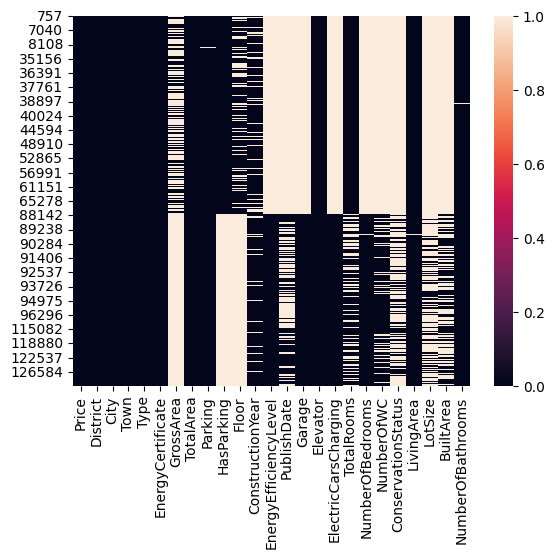

In [14]:
# heatmap for missing values

sns.heatmap(data.isna())

### Numeric feature heatmap

In [15]:
numerical_features = data.select_dtypes(exclude='object').columns.tolist()
numerical_features

['Price',
 'GrossArea',
 'TotalArea',
 'Parking',
 'ConstructionYear',
 'TotalRooms',
 'NumberOfBedrooms',
 'NumberOfWC',
 'LivingArea',
 'LotSize',
 'BuiltArea',
 'NumberOfBathrooms']

Pairs of features with correlation above the treshold of 0.7


,Feature 1,Feature 2,Correlation
0,GrossArea,TotalRooms,0.713
1,GrossArea,LivingArea,0.885
2,GrossArea,NumberOfBathrooms,0.742
3,TotalArea,NumberOfBedrooms,0.785
4,TotalArea,LivingArea,0.830
5,TotalArea,BuiltArea,0.894
6,TotalRooms,NumberOfBedrooms,0.897
7,TotalRooms,LivingArea,0.704
8,NumberOfBedrooms,LivingArea,0.781
9,NumberOfBedrooms,BuiltArea,0.720


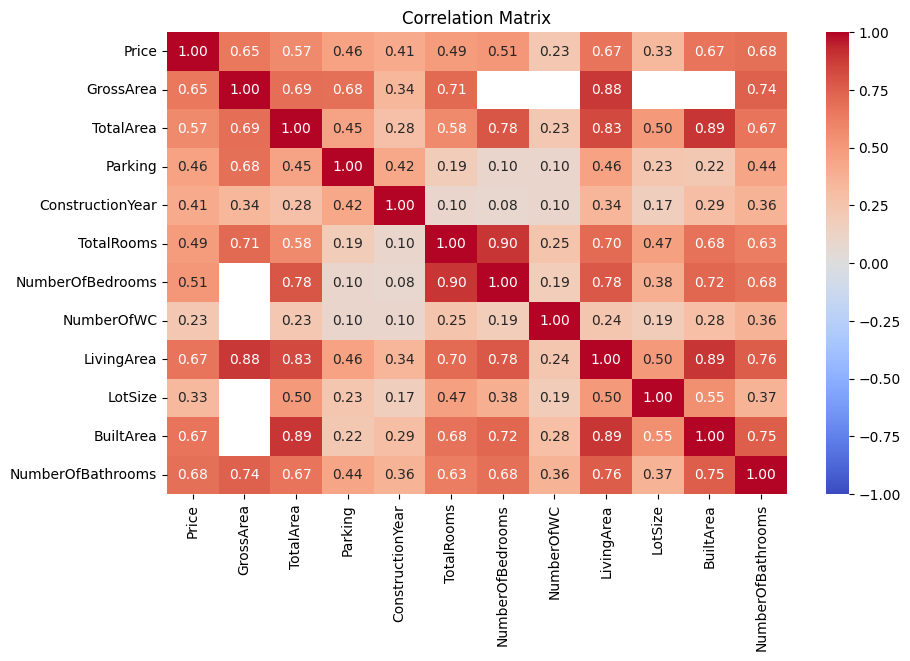

In [16]:
correlation_matrix = data.corr(method='spearman', numeric_only=True)

# Set threshold
threshold = 0.7

# Get pairs of features with correlation above the threshold
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation = round(abs(correlation_matrix.iloc[i, j]), 3)
        if correlation > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation))

# Create DataFrame from pairs
df_pairs = pd.DataFrame(high_correlation_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

print("Pairs of features with correlation above the treshold of", threshold)
display(df_pairs)
print("\n\n")

# Present the correlation matrix with color coding and rounding the correlation to 2 decimal places
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix above with spearman correlation, we see that following pairs are highly correlated:  
* TotalRooms - NumberOfBedrooms = 0.897
* TotalArea - BuiltArea = 0.894
* LivingArea - BuiltArea = 0.894
* GrossArea - LivingArea = 0.885
* TotalArea - LivingArea = 0.830
* TotalArea - NumberOfBathroom = 0.785
* NumberOfBedrooms - LivingArea = 0.781

1. Missing value for TotalRooms is 19.06%, while NumberOfBedrooms are 53.76%. due to missing value, TotalRooms will be kept
2. It seems that GrossArea, TotalArea, LivingArea, BuiltArea are all highly correlated each other. Based on missing value, TotalArea will be kept
* TotalArea: missing 0.00%  

based on the missing values, BuildArea, GrossArea, LivingArea, NumberOfBedrooms will be removed as there are more missing values for those features.
LotSize is not correlatd with price, will be removed






### Categorical feature checking




In [17]:
categorical_features = data.select_dtypes(include='object').columns.tolist()
categorical_features

['District',
 'City',
 'Town',
 'Type',
 'EnergyCertificate',
 'HasParking',
 'Floor',
 'EnergyEfficiencyLevel',
 'PublishDate',
 'Garage',
 'Elevator',
 'ElectricCarsCharging',
 'ConservationStatus']

* PublishDate is not relevant. will be removed.
* Based on the missing value analysis, conservationStatus will be removed.

In [18]:
def get_distinct_values(df, columns_to_check):
    # Initialize a list to store results
    results = []

    # Iterate over each column
    for col_name in columns_to_check:
        # Get distinct values for the column
        distinct_values = df[col_name].unique()

        # Convert the array of distinct values to a comma-separated string
        distinct_values_str = ', '.join(map(str, distinct_values))

        # Append the column name and distinct values to the results list
        results.append([col_name, distinct_values_str])

    # Create a DataFrame from the results list
    result_df = pd.DataFrame(results, columns=['Feature', 'Distinct Values'])
    return result_df

In [19]:
print("Unique Values in Categorical Columns")
display(get_distinct_values(data,["District", "City", "Town", "Type", "HasParking","Garage","Elevator", "EnergyCertificate", "ElectricCarsCharging","Floor", "EnergyEfficiencyLevel", "ConservationStatus"]))
print()

Unique Values in Categorical Columns


,Feature,Distinct Values
0,District,Lisboa
1,City,"Sintra, Lisboa, Azambuja, Cascais, Vila Franca..."
2,Town,"Algueirão-Mem Martins, Misericórdia, Ajuda, Az..."
3,Type,"Apartment, House, Duplex, Other - Residential,..."
4,HasParking,"True, False, nan"
5,Garage,"nan, False, True"
6,Elevator,"True, False"
7,EnergyCertificate,"C, D, E, NC, B, F, A, A+, B-, G, No Certificate"
8,ElectricCarsCharging,"nan, False, True"
9,Floor,"1st Floor, 5th Floor, Basement Level, 3rd Floo..."


/tmp/ipython-input-1349506149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Price', data=data, palette='viridis')


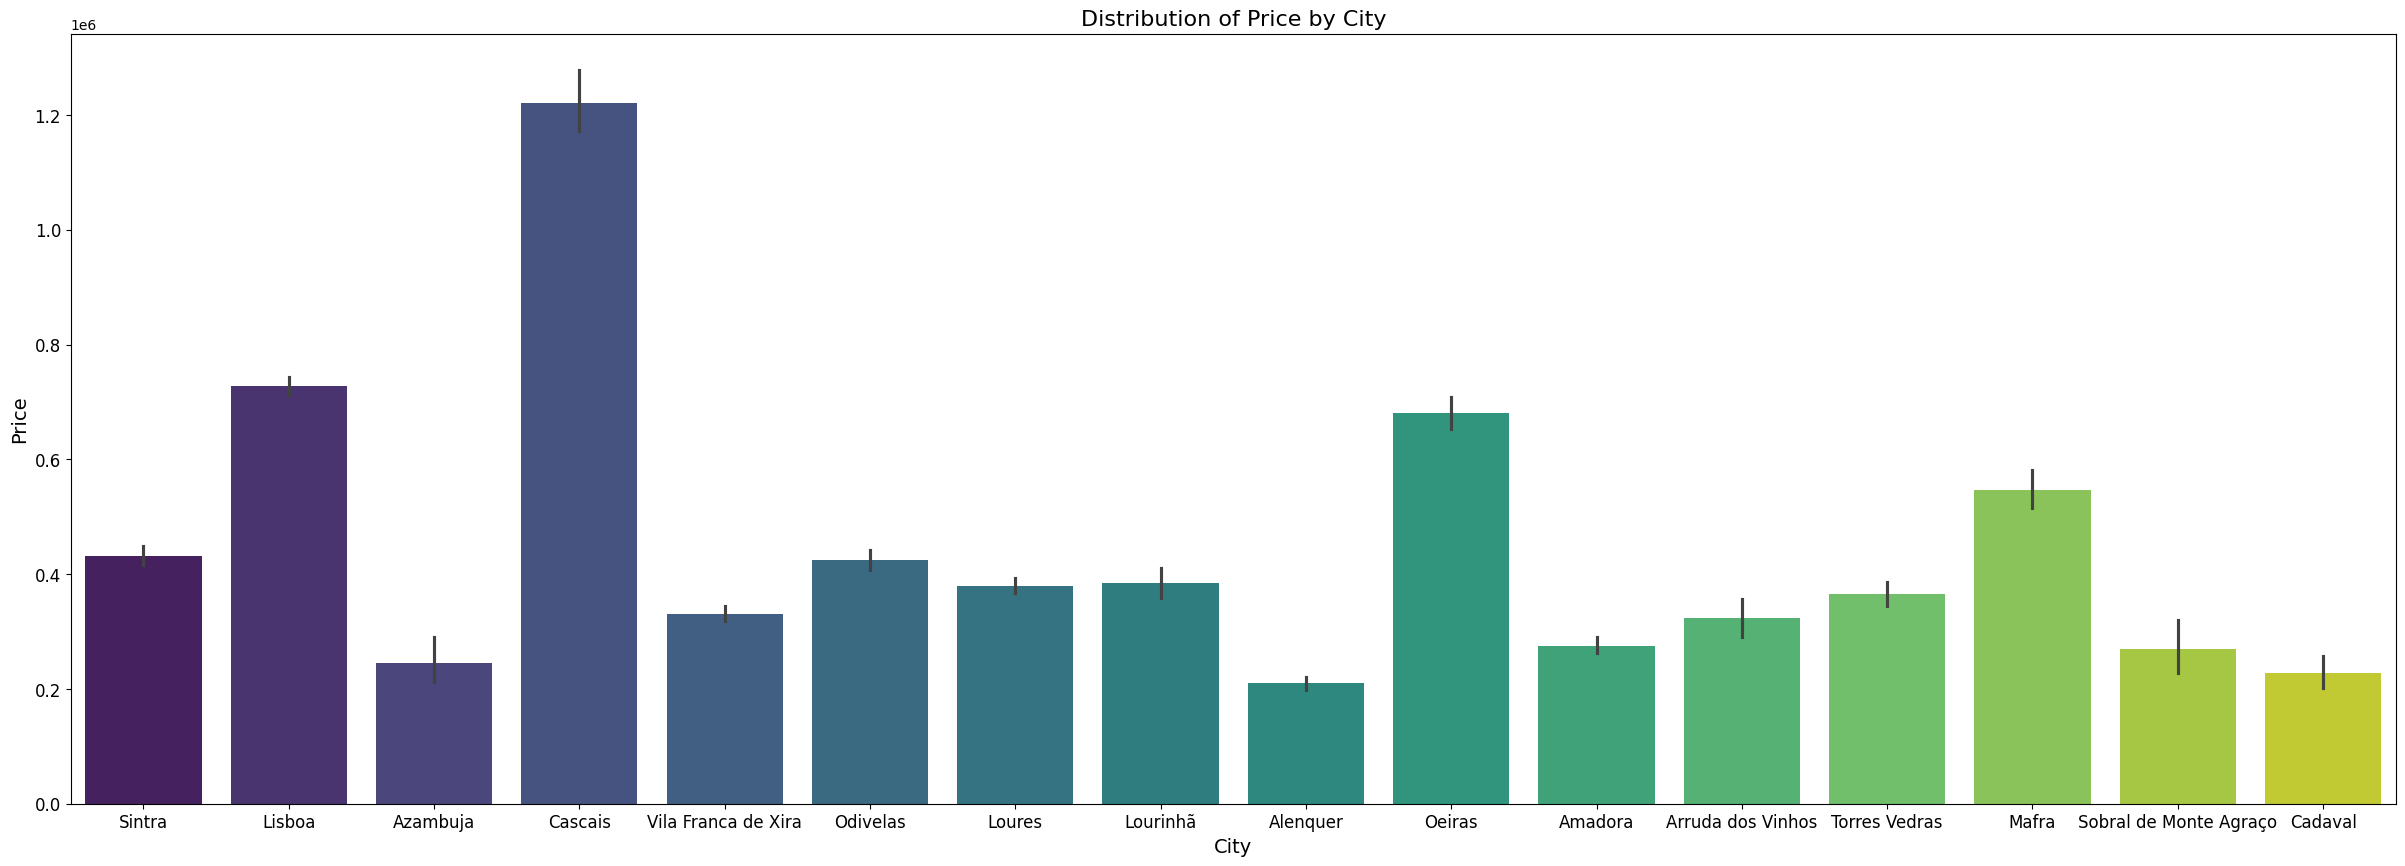

In [20]:
# Box plot for City and Price
plt.figure(figsize=(30, 10))
sns.barplot(x='City', y='Price', data=data, palette='viridis')

# Customize the plot
plt.title('Distribution of Price by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# h - house,cottage,villa,semi,terrace
# u - unit, duplex
# t - townhouse


/tmp/ipython-input-2030310813.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Price', data=data, palette='viridis')


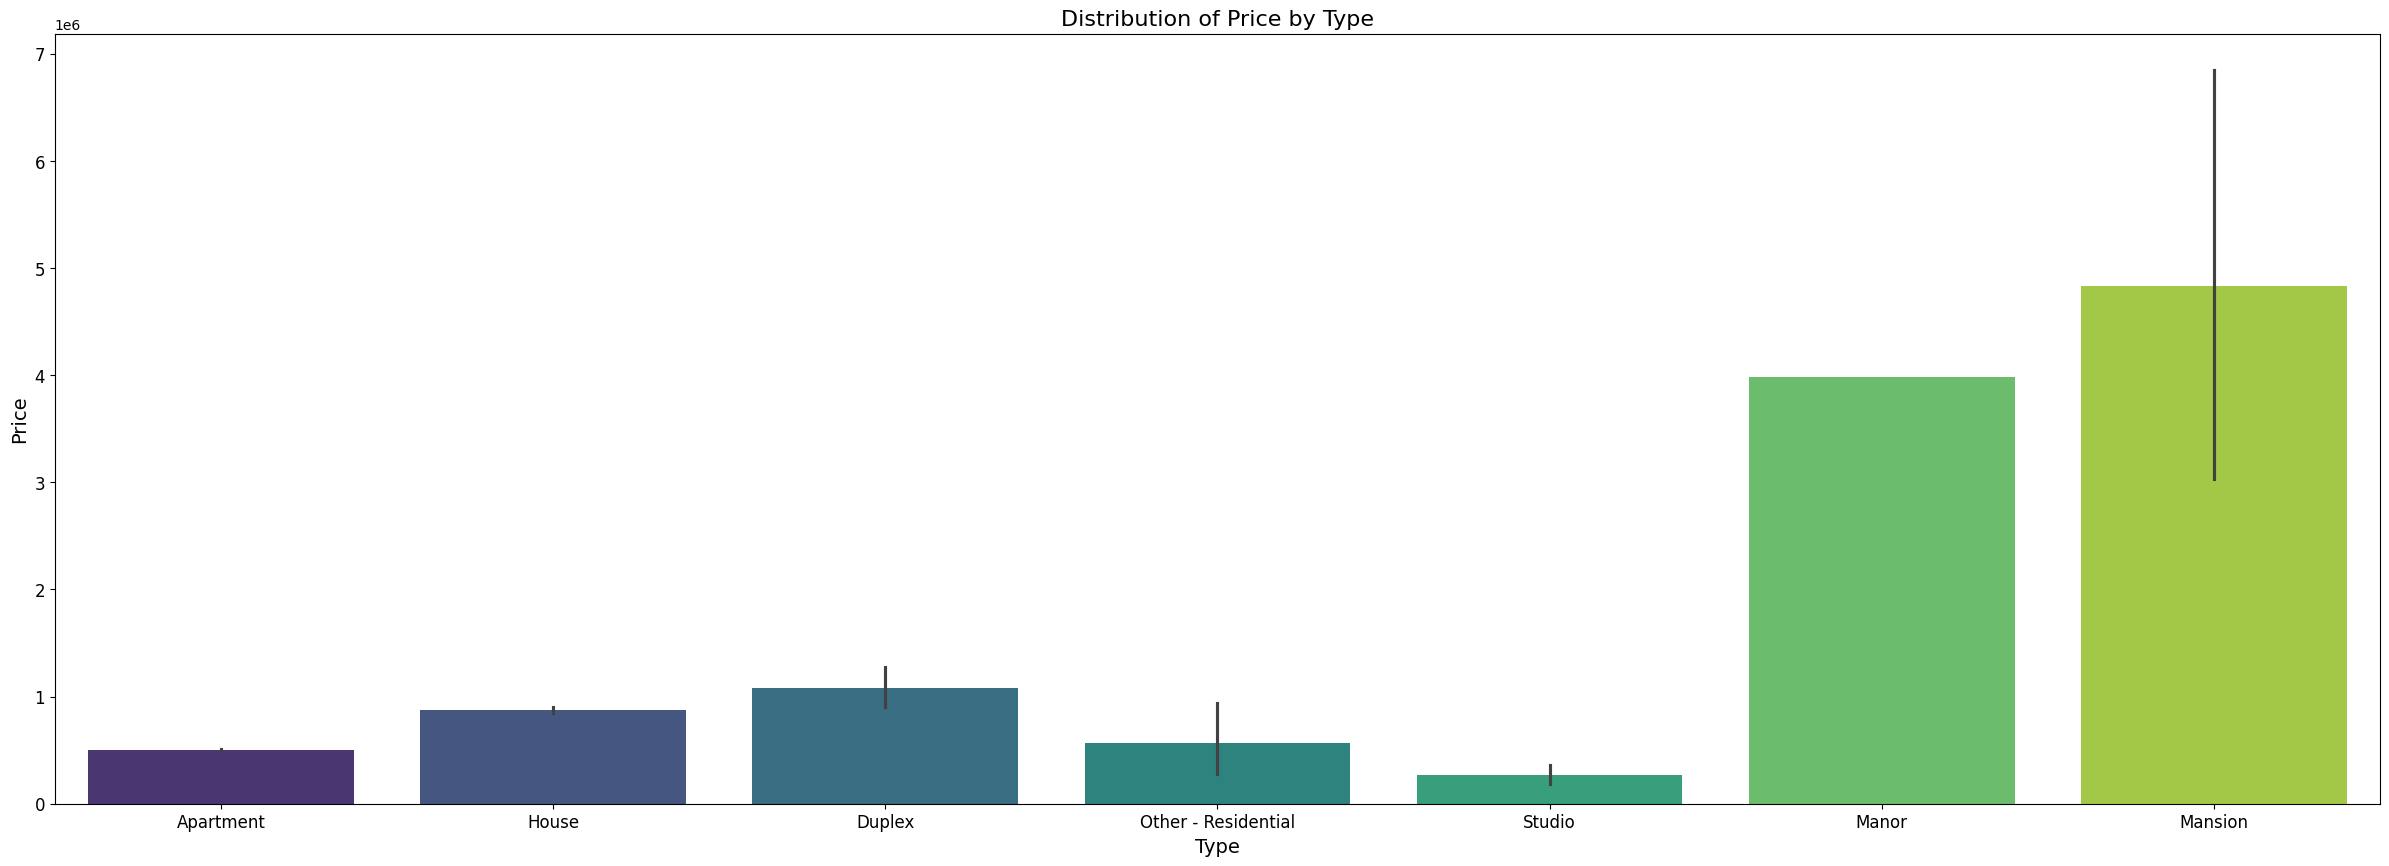

In [21]:
# Box plot for Type	and Price
plt.figure(figsize=(30, 10))
sns.barplot(x='Type', y='Price', data=data, palette='viridis')

# Customize the plot
plt.title('Distribution of Price by Type', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



/tmp/ipython-input-2751615982.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EnergyCertificate', y='Price', data=data, palette='viridis')


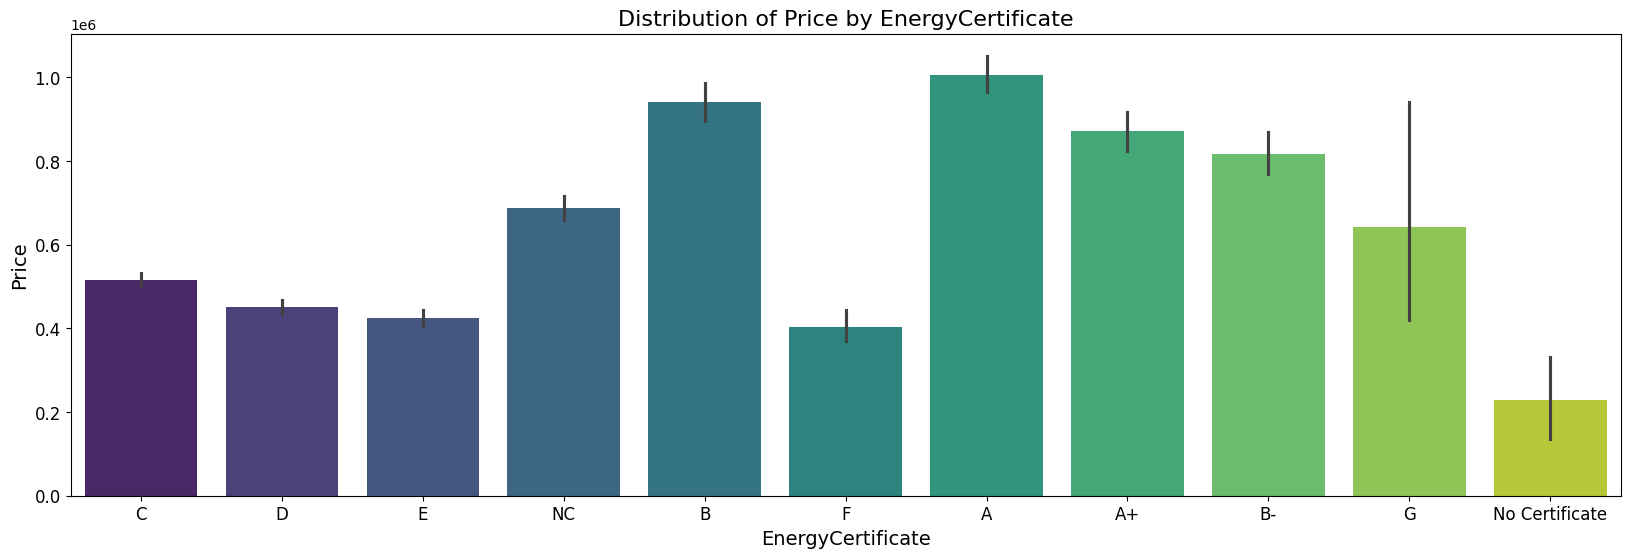

In [22]:
# Box plot for EnergyCertificate and Price
plt.figure(figsize=(20,6))
sns.barplot(x='EnergyCertificate', y='Price', data=data, palette='viridis')

# Customize the plot
plt.title('Distribution of Price by EnergyCertificate', fontsize=16)
plt.xlabel('EnergyCertificate', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/tmp/ipython-input-3077337640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parking', y='Price', data=data, palette='viridis')


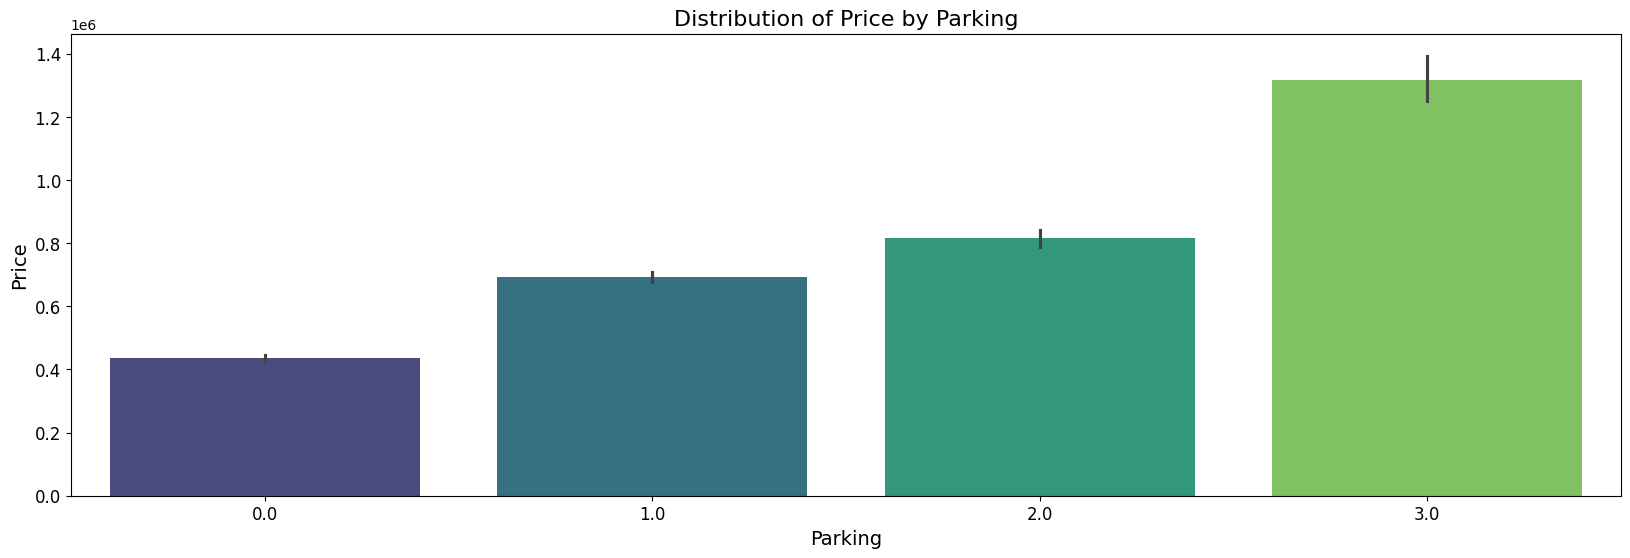

In [23]:
# Box plot for Parking and Price
plt.figure(figsize=(20,6))
sns.barplot(x='Parking', y='Price', data=data, palette='viridis')

# Customize the plot
plt.title('Distribution of Price by Parking', fontsize=16)
plt.xlabel('Parking', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/tmp/ipython-input-416071079.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Floor', y='Price', data=data, palette='viridis')


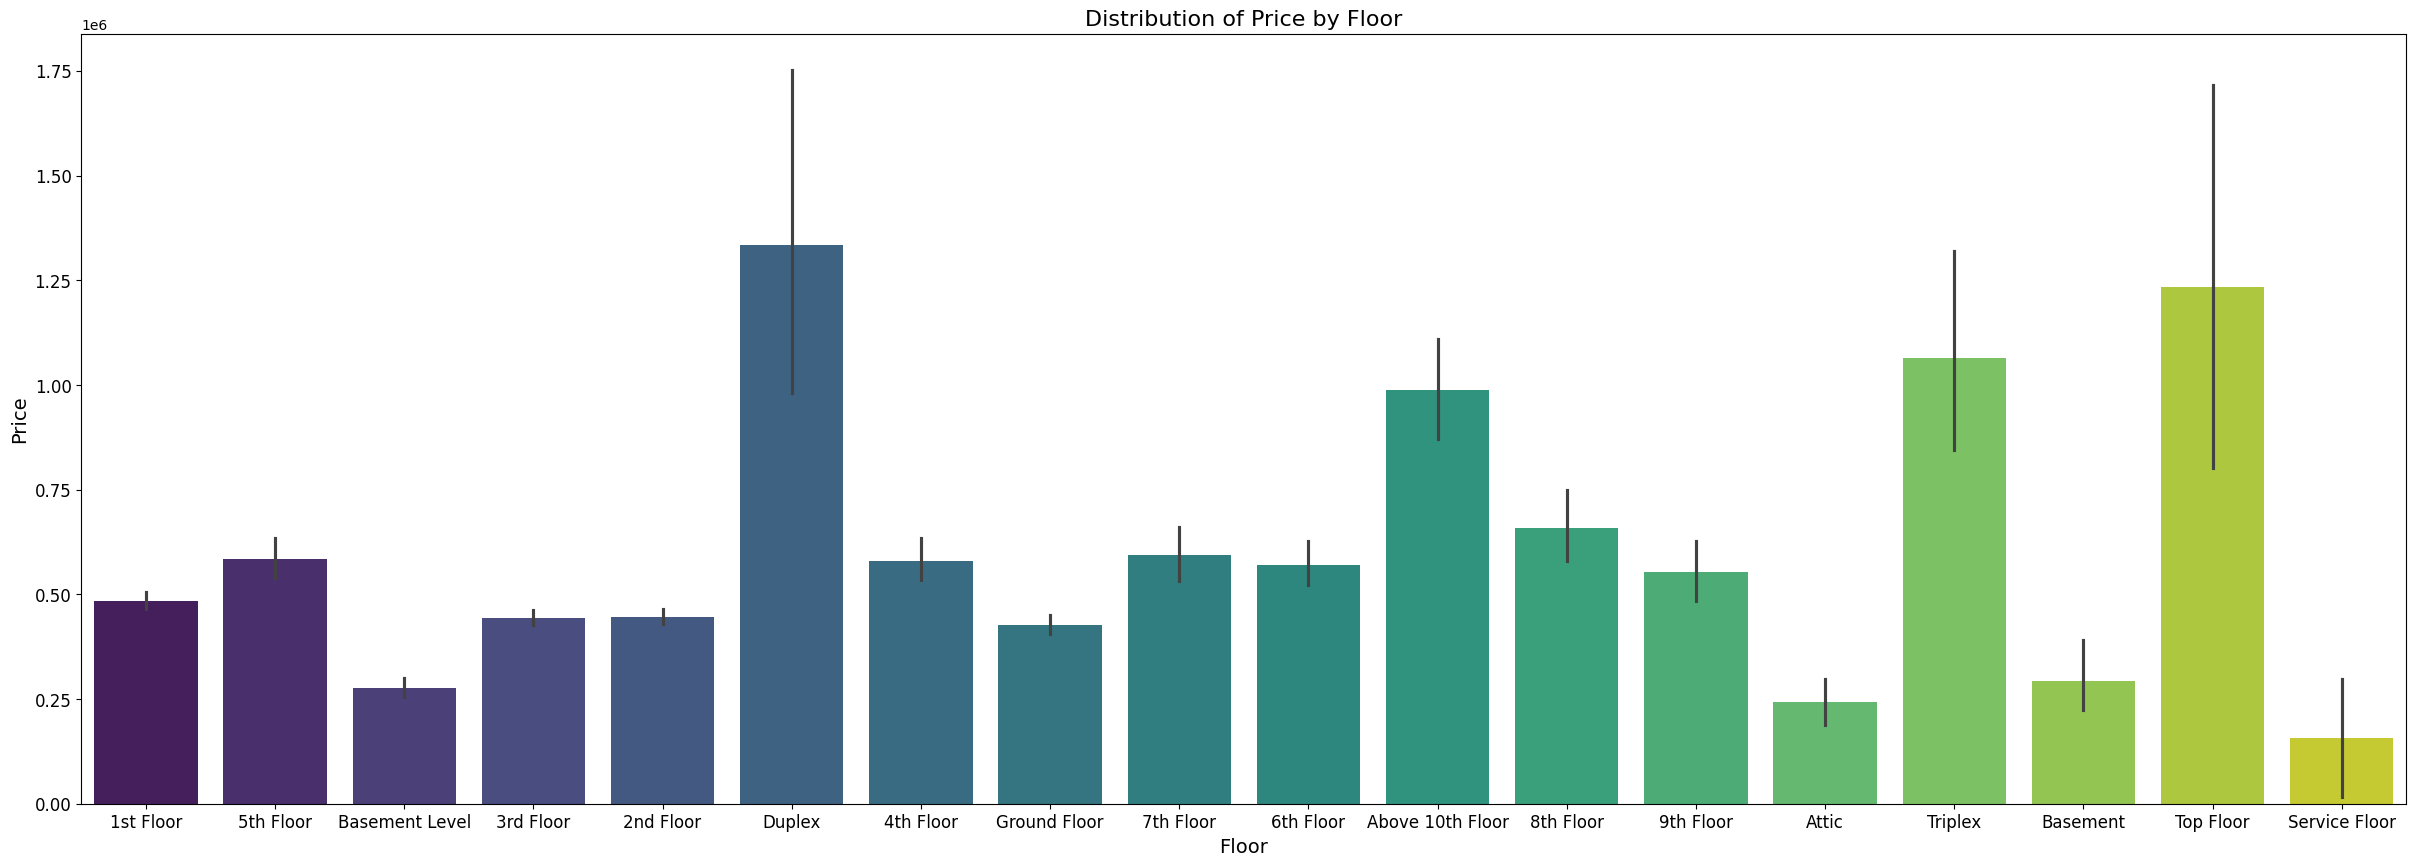

In [24]:
# Box plot for Floor and Price
plt.figure(figsize=(30,10))
sns.barplot(x='Floor', y='Price', data=data, palette='viridis')

# Customize the plot
plt.title('Distribution of Price by Floor', fontsize=16)
plt.xlabel('Floor', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/tmp/ipython-input-1086496608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EnergyEfficiencyLevel', y='Price', data=data, palette='viridis')


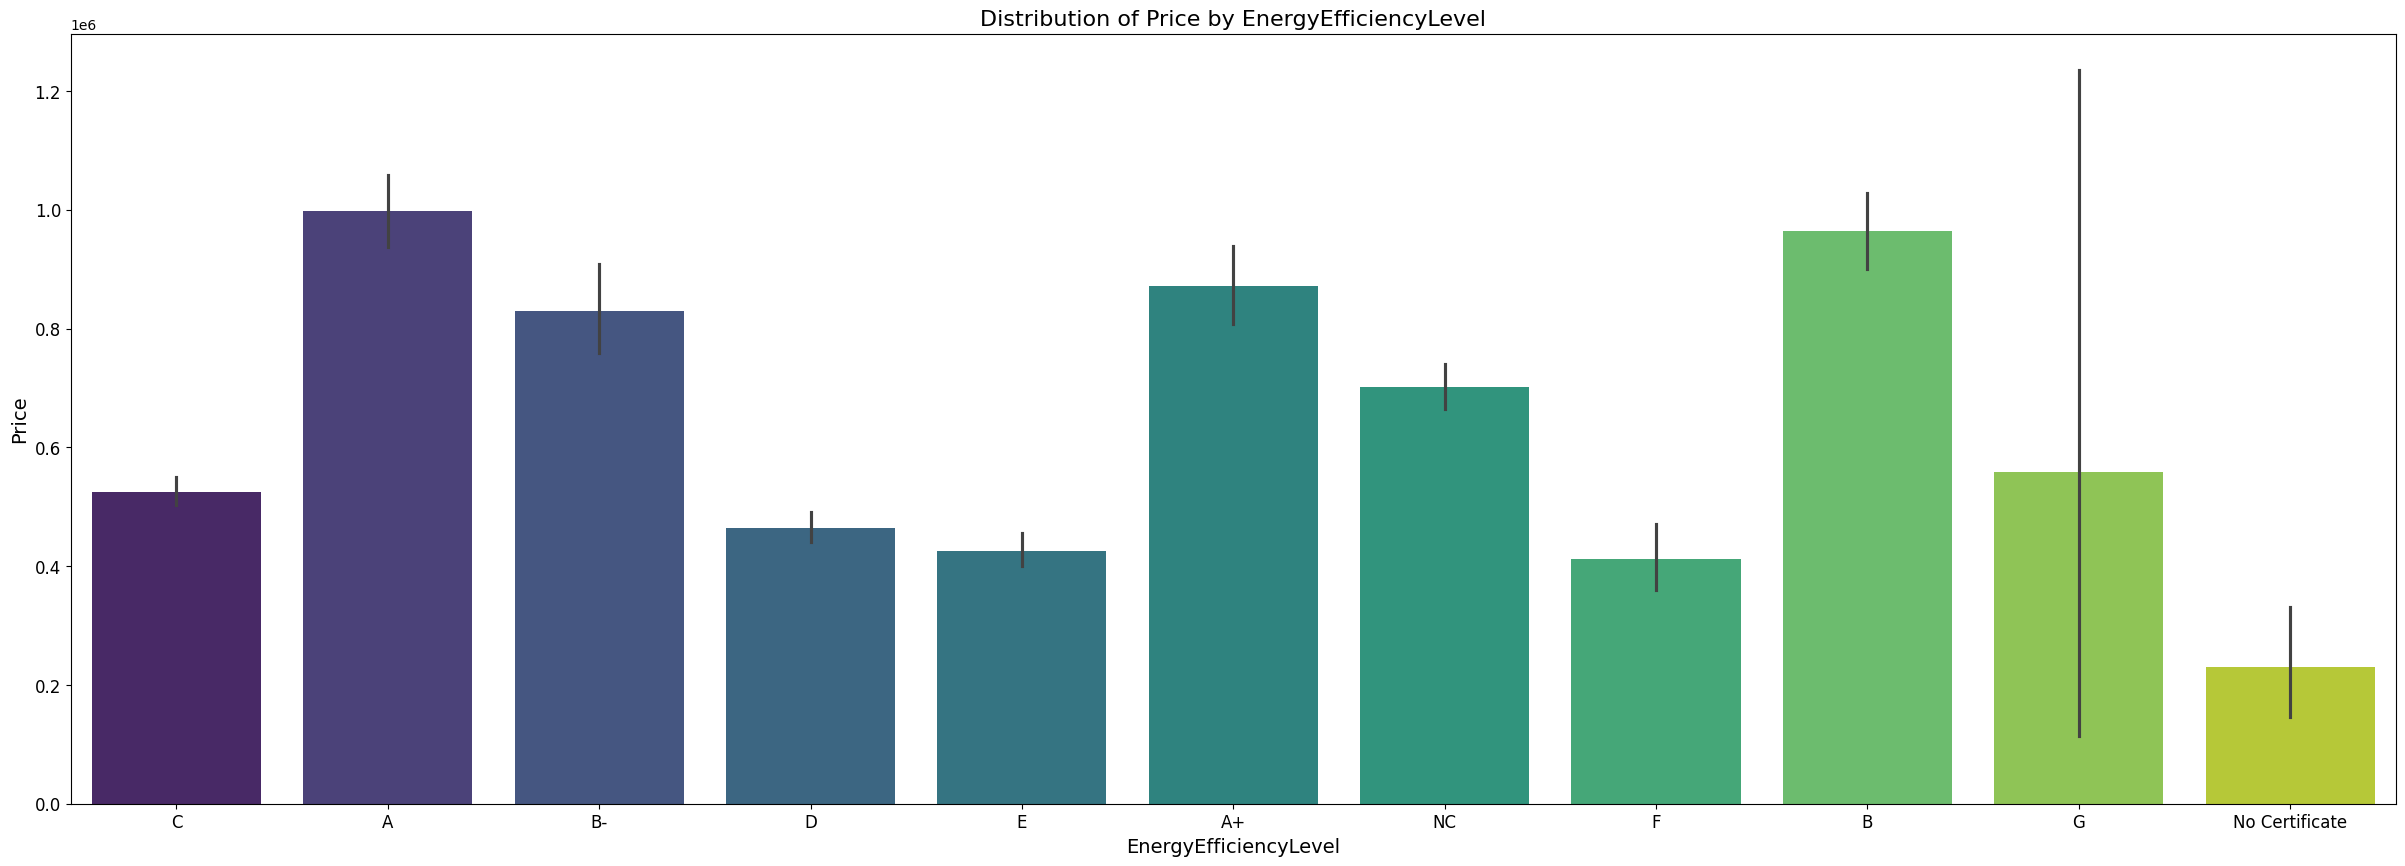

In [25]:
# Box plot for EnergyEfficiencyLevel and Price
plt.figure(figsize=(30,10))
sns.barplot(x='EnergyEfficiencyLevel', y='Price', data=data, palette='viridis')

# Customize the plot
plt.title('Distribution of Price by EnergyEfficiencyLevel', fontsize=16)
plt.xlabel('EnergyEfficiencyLevel', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/tmp/ipython-input-3469082898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ConservationStatus', y='Price', data=data, palette='viridis')


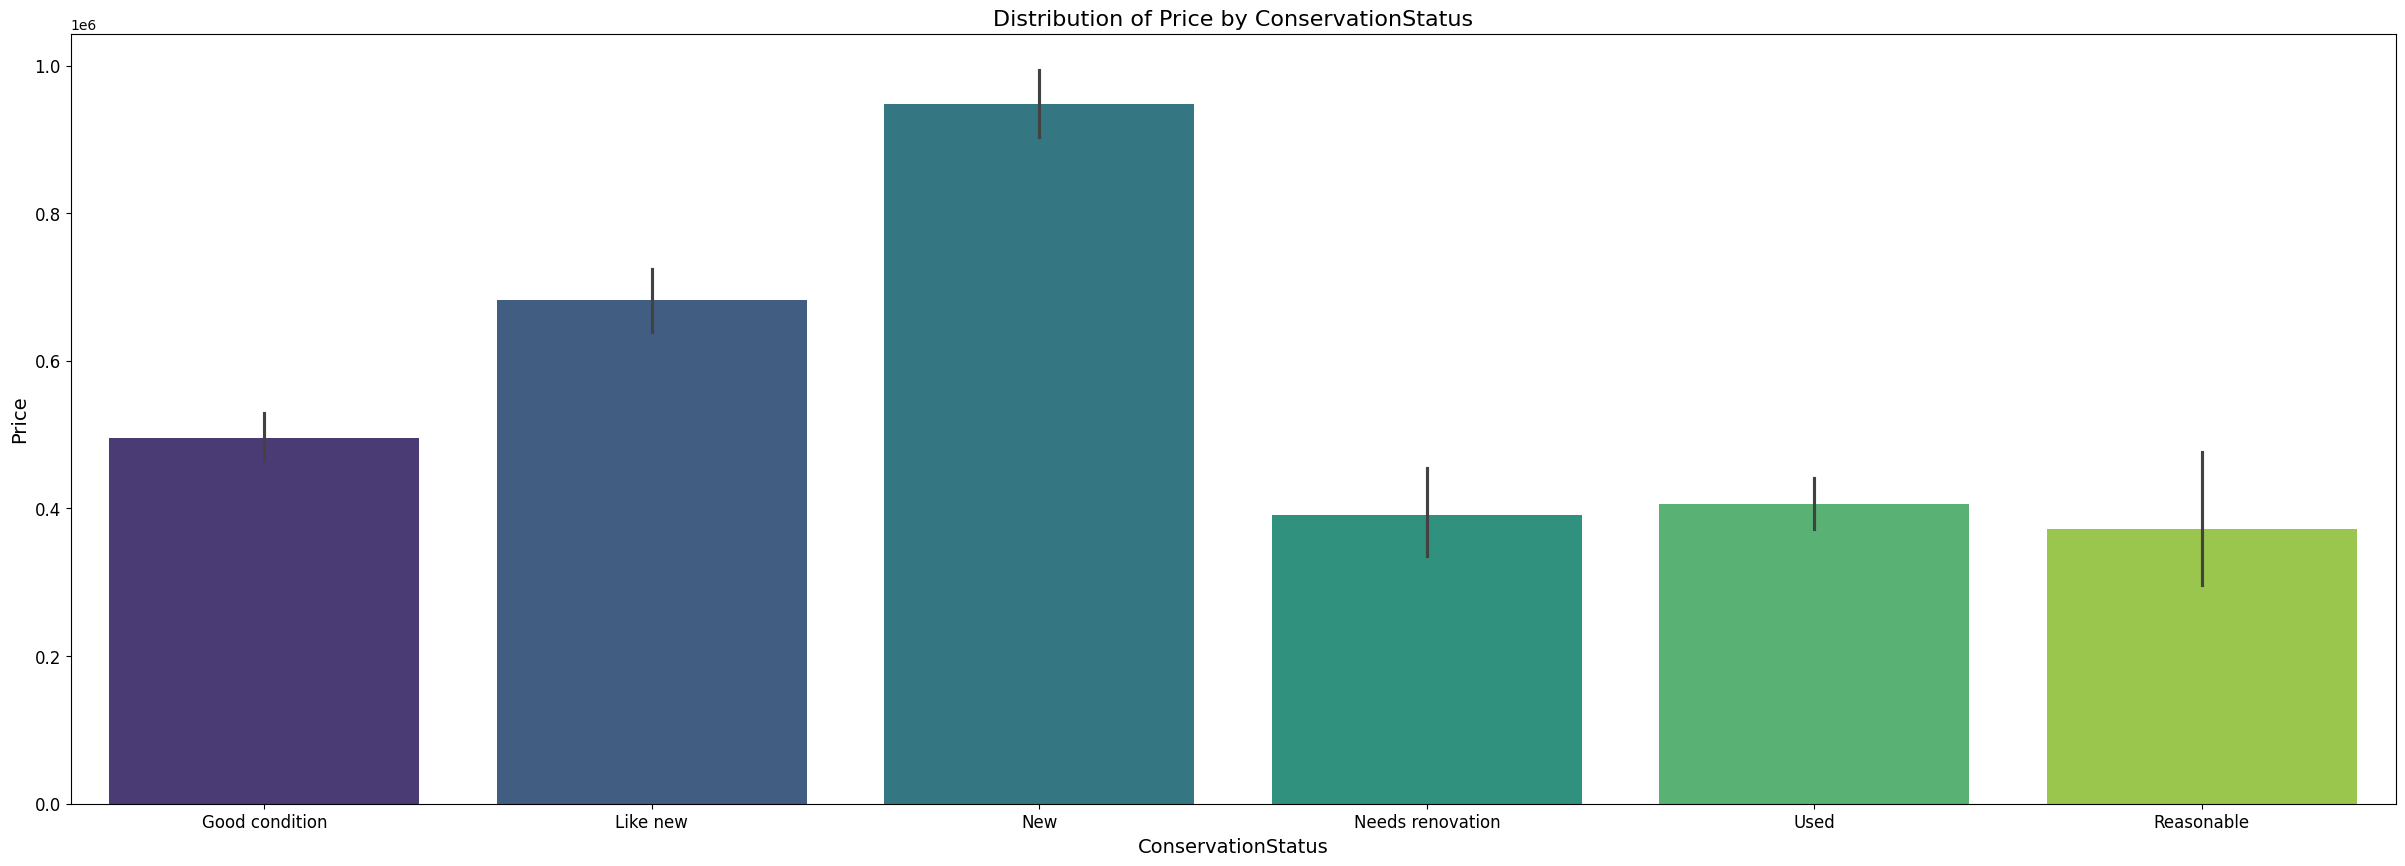

In [26]:
# Box plot for ConservationStatus and Price
plt.figure(figsize=(30,10))
sns.barplot(x='ConservationStatus', y='Price', data=data, palette='viridis')

# Customize the plot
plt.title('Distribution of Price by ConservationStatus', fontsize=16)
plt.xlabel('ConservationStatus', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/tmp/ipython-input-2213590882.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HasParking', y='Price', data=data, palette='viridis')


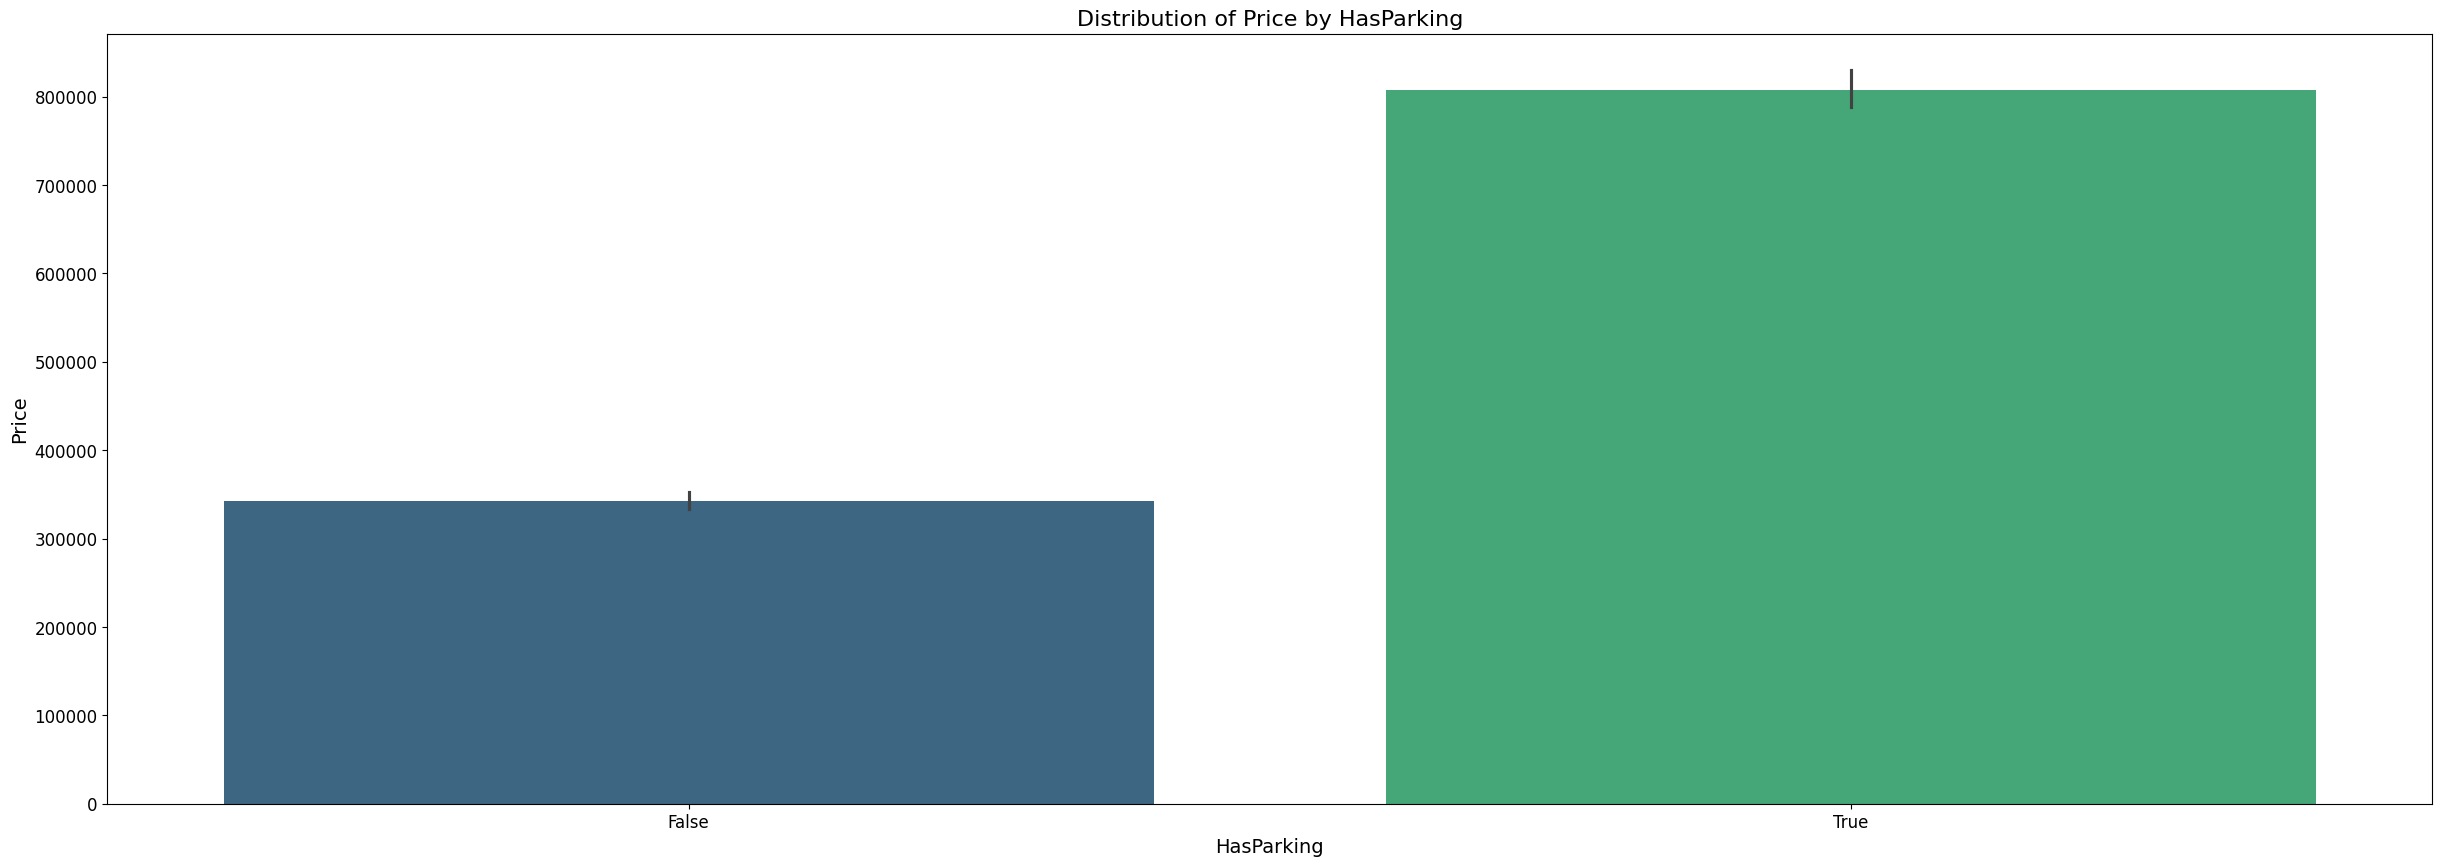

In [27]:
# Box plot for HasParking and Price
plt.figure(figsize=(30,10))
sns.barplot(x='HasParking', y='Price', data=data, palette='viridis')

# Customize the plot
plt.title('Distribution of Price by HasParking', fontsize=16)
plt.xlabel('HasParking', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/tmp/ipython-input-1019874135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Garage', y='Price', data=data, palette='viridis')


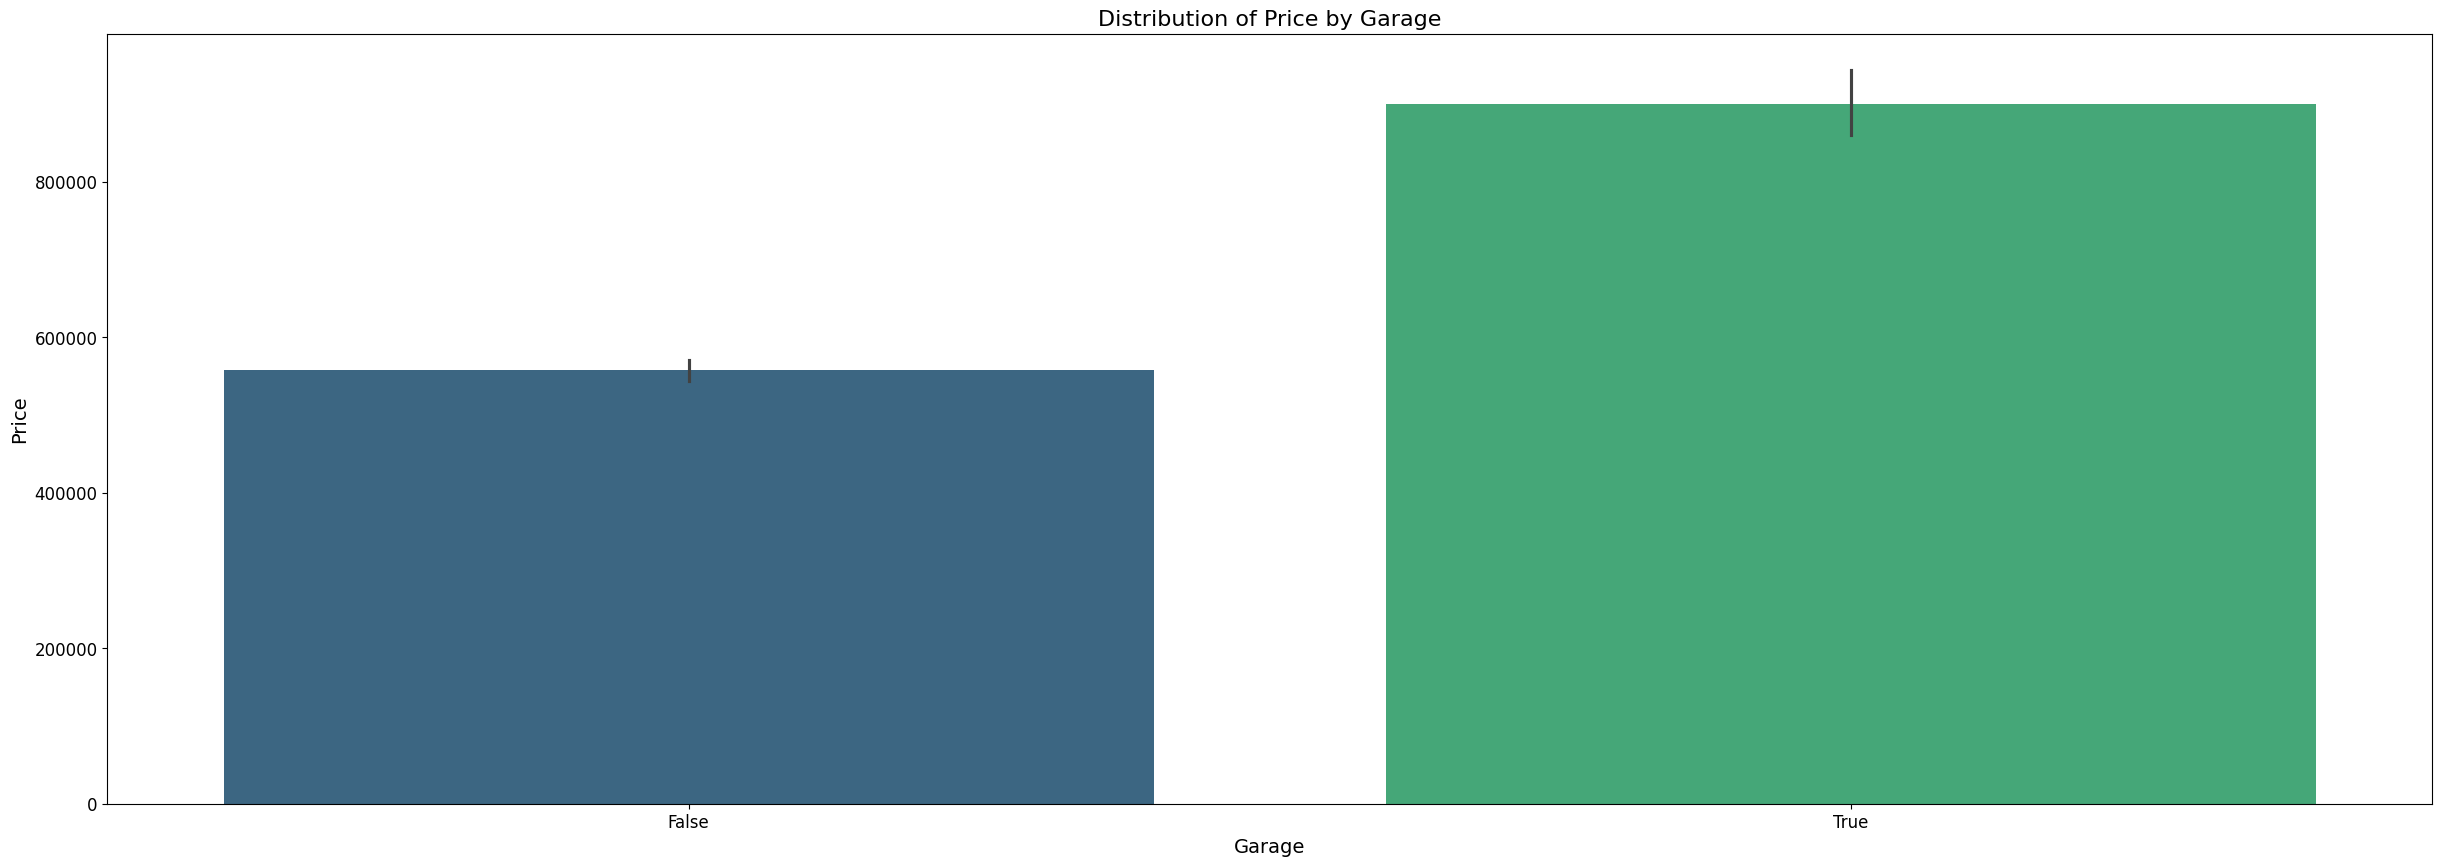

In [28]:
# Box plot for Garage and Price
plt.figure(figsize=(30,10))
sns.barplot(x='Garage', y='Price', data=data, palette='viridis')

# Customize the plot
plt.title('Distribution of Price by Garage', fontsize=16)
plt.xlabel('Garage', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/tmp/ipython-input-849369369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Elevator', y='Price', data=data, palette='viridis')


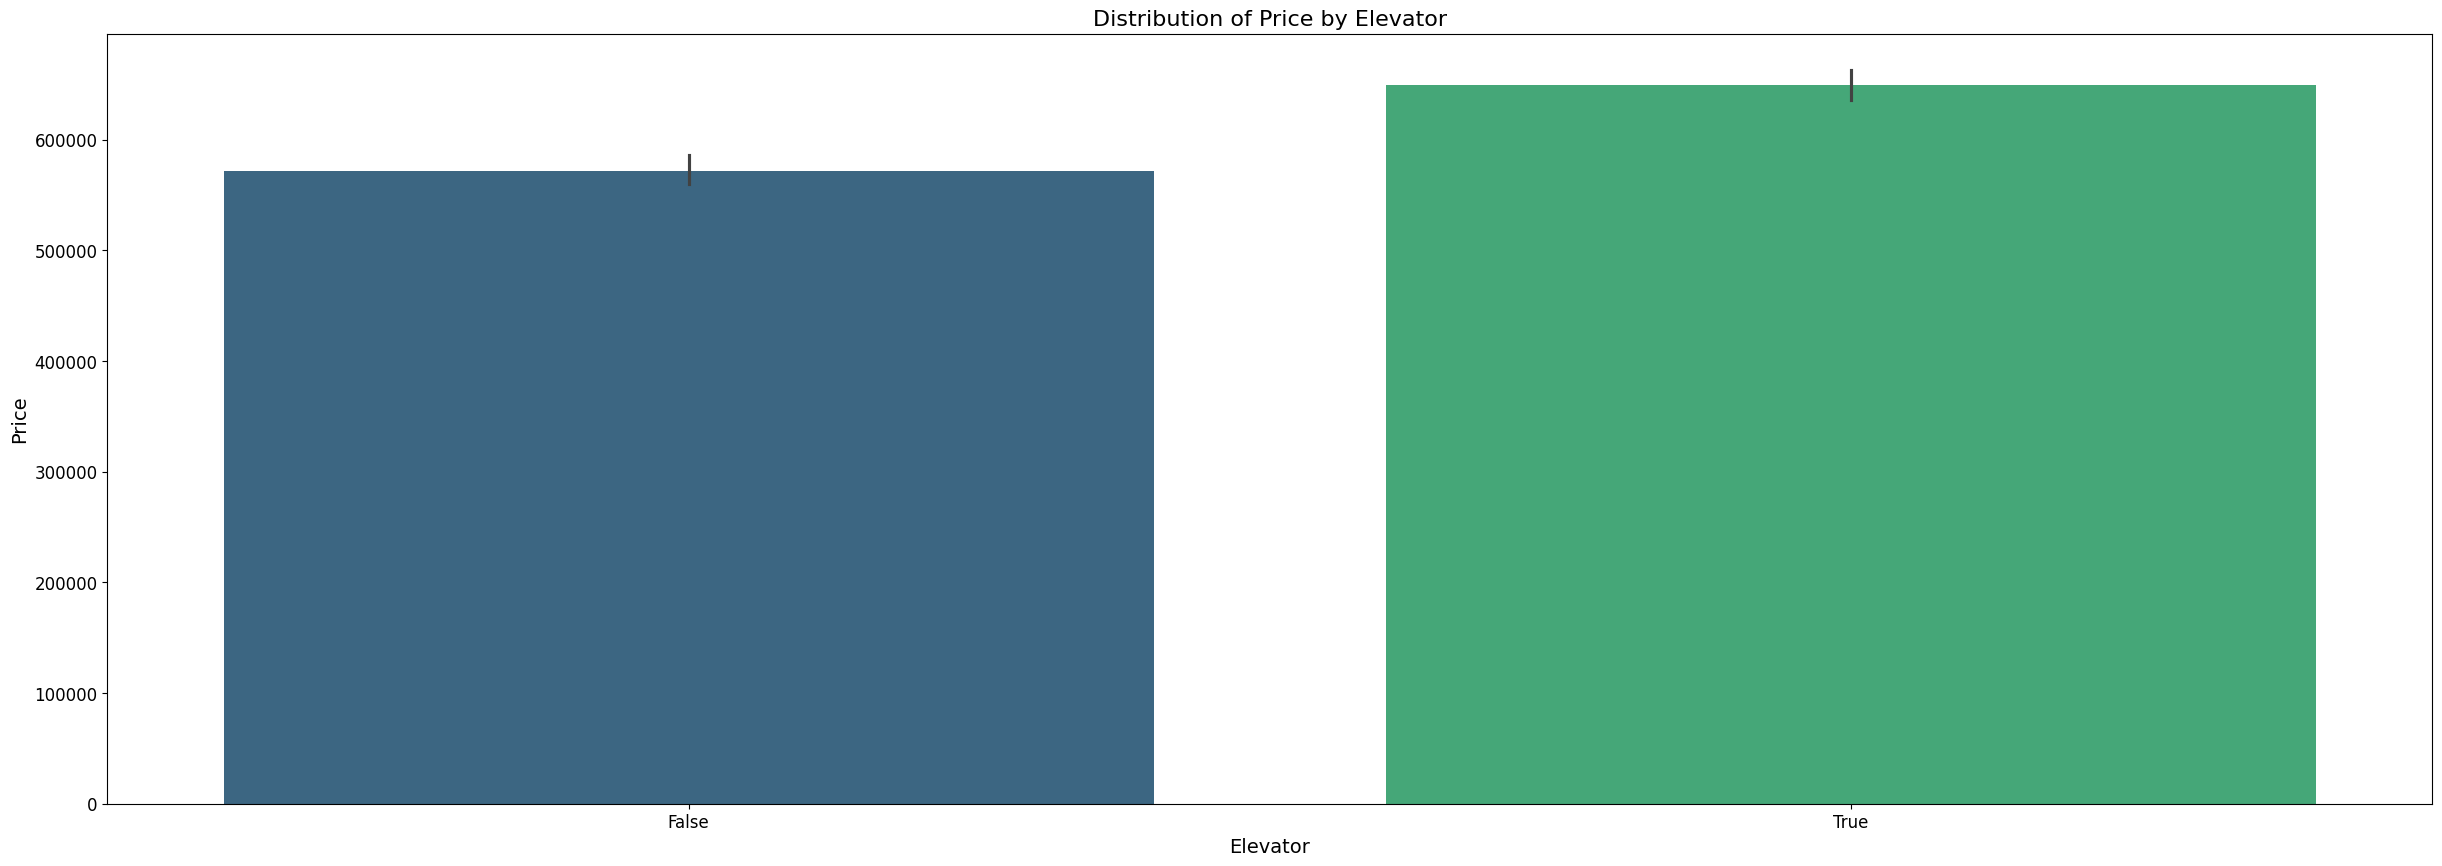

In [29]:
# Box plot for Elevator and Price
plt.figure(figsize=(30,10))
sns.barplot(x='Elevator', y='Price', data=data, palette='viridis')

# Customize the plot
plt.title('Distribution of Price by Elevator', fontsize=16)
plt.xlabel('Elevator', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/tmp/ipython-input-1470151739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ElectricCarsCharging', y='Price', data=data, palette='viridis')


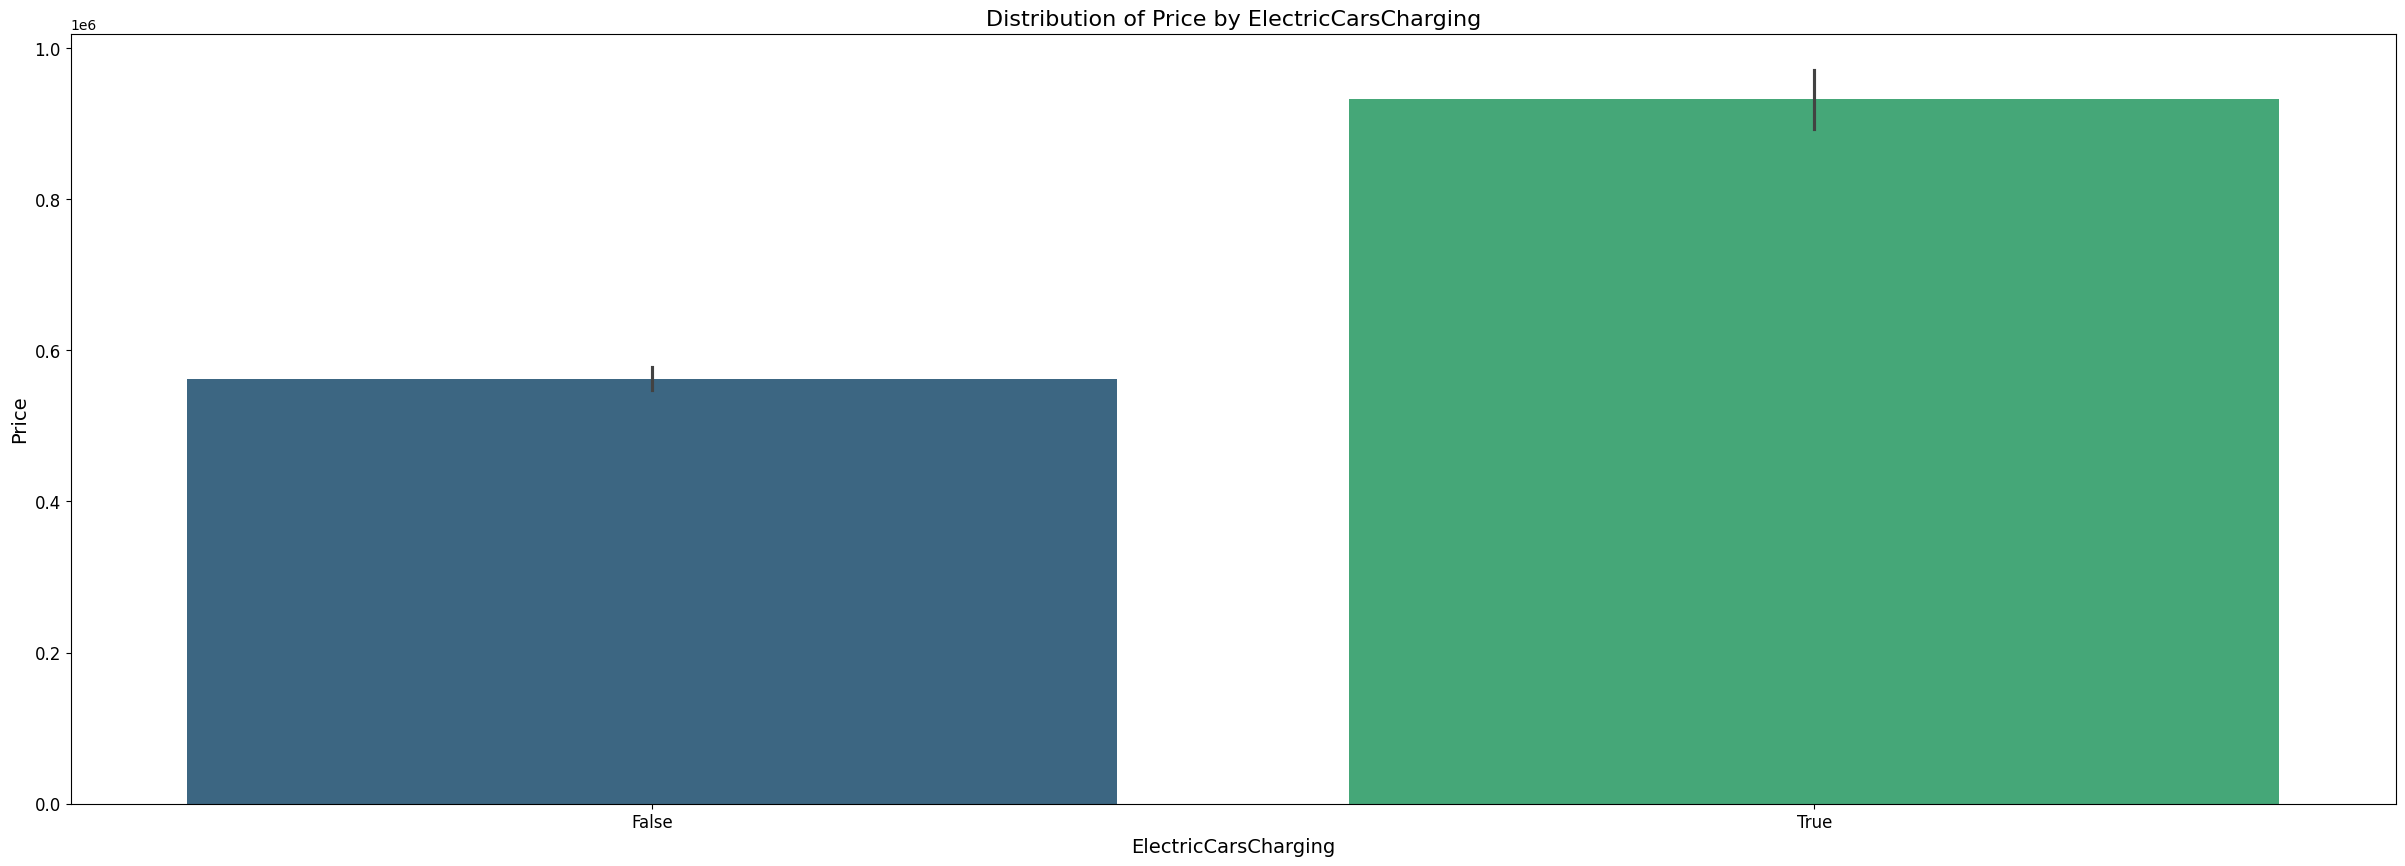

In [30]:
# Box plot for ElectricCarsCharging and Price
plt.figure(figsize=(30,10))
sns.barplot(x='ElectricCarsCharging', y='Price', data=data, palette='viridis')

# Customize the plot
plt.title('Distribution of Price by ElectricCarsCharging', fontsize=16)
plt.xlabel('ElectricCarsCharging', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [31]:
missing_percent = data[categorical_features].isna().mean() * 100
missing_percent.sort_values(ascending=False)
print(missing_percent)

District                  0.000000
City                      0.000000
Town                      0.000000
Type                      0.000000
EnergyCertificate         0.000000
HasParking               46.410594
Floor                    59.951930
EnergyEfficiencyLevel    53.589406
PublishDate              77.071335
Garage                   53.589406
Elevator                  0.000000
ElectricCarsCharging     53.589406
ConservationStatus       81.202667
dtype: float64


PublishDate and ConvervationStatus has more than 70% missing data. Both variables will be deleted

In [32]:
copy_2 = data.copy()

# Data Check and Cleaning

## Dropping irrelevant variables

GrossArea, Floor, PublishDate, ConservationStatus, BuiltArea, NumberOfBedrooms, LotSize,, TotalArea will be removed, based on the analysis above

In [33]:
data.drop(["NumberOfBedrooms", "GrossArea", "LivingArea", "BuiltArea", "LotSize", "PublishDate", "ConservationStatus"], axis=1, inplace=True)
data.head(5)

,Price,District,City,Town,Type,EnergyCertificate,TotalArea,Parking,HasParking,Floor,ConstructionYear,EnergyEfficiencyLevel,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfWC,NumberOfBathrooms
757,200000.0,Lisboa,Sintra,Algueirão-Mem Martins,Apartment,C,79.0,1.0,True,1st Floor,2000.0,NaN,NaN,True,NaN,2.0,NaN,1.0
1619,595000.0,Lisboa,Lisboa,Misericórdia,Apartment,D,110.0,0.0,False,1st Floor,1937.0,NaN,NaN,False,NaN,4.0,NaN,2.0
1640,315000.0,Lisboa,Lisboa,Ajuda,Apartment,D,68.0,0.0,False,5th Floor,1963.0,NaN,NaN,True,NaN,2.0,NaN,1.0
1682,100000.0,Lisboa,Azambuja,Azambuja,Apartment,D,208.0,0.0,False,Basement Level,1978.0,NaN,NaN,False,NaN,2.0,NaN,1.0
2124,300000.0,Lisboa,Lisboa,Ajuda,Apartment,C,0.0,0.0,False,1st Floor,1967.0,NaN,NaN,True,NaN,2.0,NaN,1.0


Pairs of features with correlation above the treshold of 0.7


,Feature 1,Feature 2,Correlation


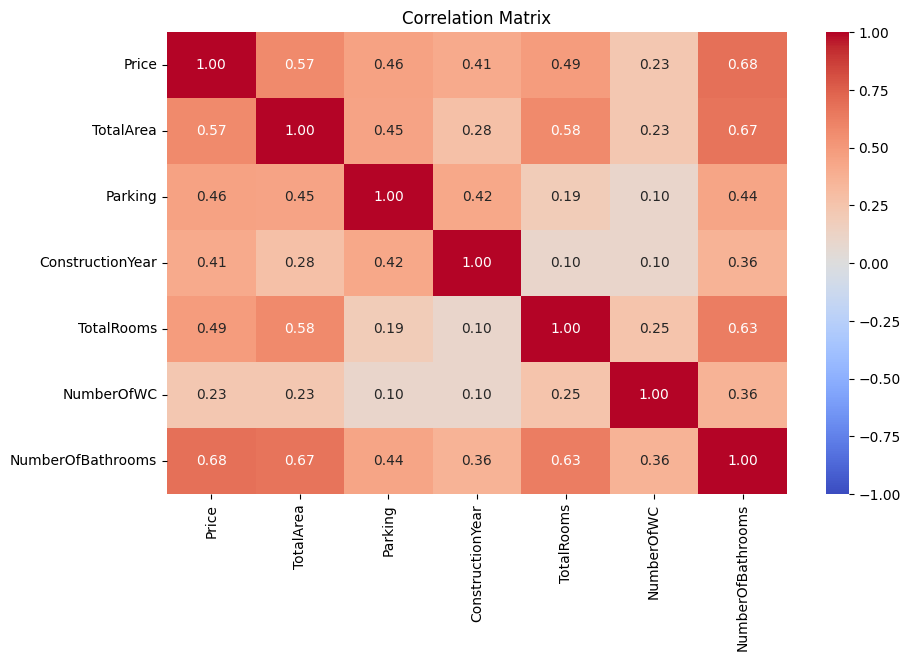

In [34]:
correlation_matrix = data.corr(method='spearman', numeric_only=True)

# Set threshold
threshold = 0.7

# Get pairs of features with correlation above the threshold
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation = round(abs(correlation_matrix.iloc[i, j]), 3)
        if correlation > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation))

# Create DataFrame from pairs
df_pairs = pd.DataFrame(high_correlation_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

print("Pairs of features with correlation above the treshold of", threshold)
display(df_pairs)
print("\n\n")

# Present the correlation matrix with color coding and rounding the correlation to 2 decimal places
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [35]:
copy_3 = data.copy()

## Remove duplicates

In [36]:
duplicated_data = data.duplicated().sum()
print(f"Number of duplicated data: {duplicated_data}")

Number of duplicated data: 1414


In [37]:
df_no_duplicates = data.drop_duplicates()

In [38]:
# Display the number of rows before and after removing duplicates
print(f"Original shape: {data.shape}, New shape after removing duplicates: {df_no_duplicates.shape}")

Original shape: (22051, 18), New shape after removing duplicates: (20637, 18)


In [39]:
duplicated_data = df_no_duplicates.duplicated().sum()
print(f"Number of duplicated data: {duplicated_data}")

Number of duplicated data: 0


In [40]:
data = df_no_duplicates

In [41]:
duplicated_data = data.duplicated().sum()
print(f"Number of duplicated data: {duplicated_data}")

Number of duplicated data: 0




# Outliers

## Outlier check

### Box plot

In [42]:
def plot_multiple_boxplots(data, feats, title="Numeric Variables' Box Plots", figsize=(20, 10)):
  # Prepare figure. Create individual axes where each histogram will be placed
  fig, axes = plt.subplots(4, ceil(len(feats) / 4), figsize=figsize)

  # Plot data
  for ax, feat in zip(axes.flatten(), feats):
    sns.boxplot(x=data[feat], ax=ax)
    ax.set_title(feat)
    ax.set_xlabel("")

  # Layout
  # Add a centered title to the figure:
  plt.suptitle(title, fontsize=20)

  # Adjust vertical spacing between subplots
  plt.subplots_adjust(hspace=0.6)
  plt.show()
  return

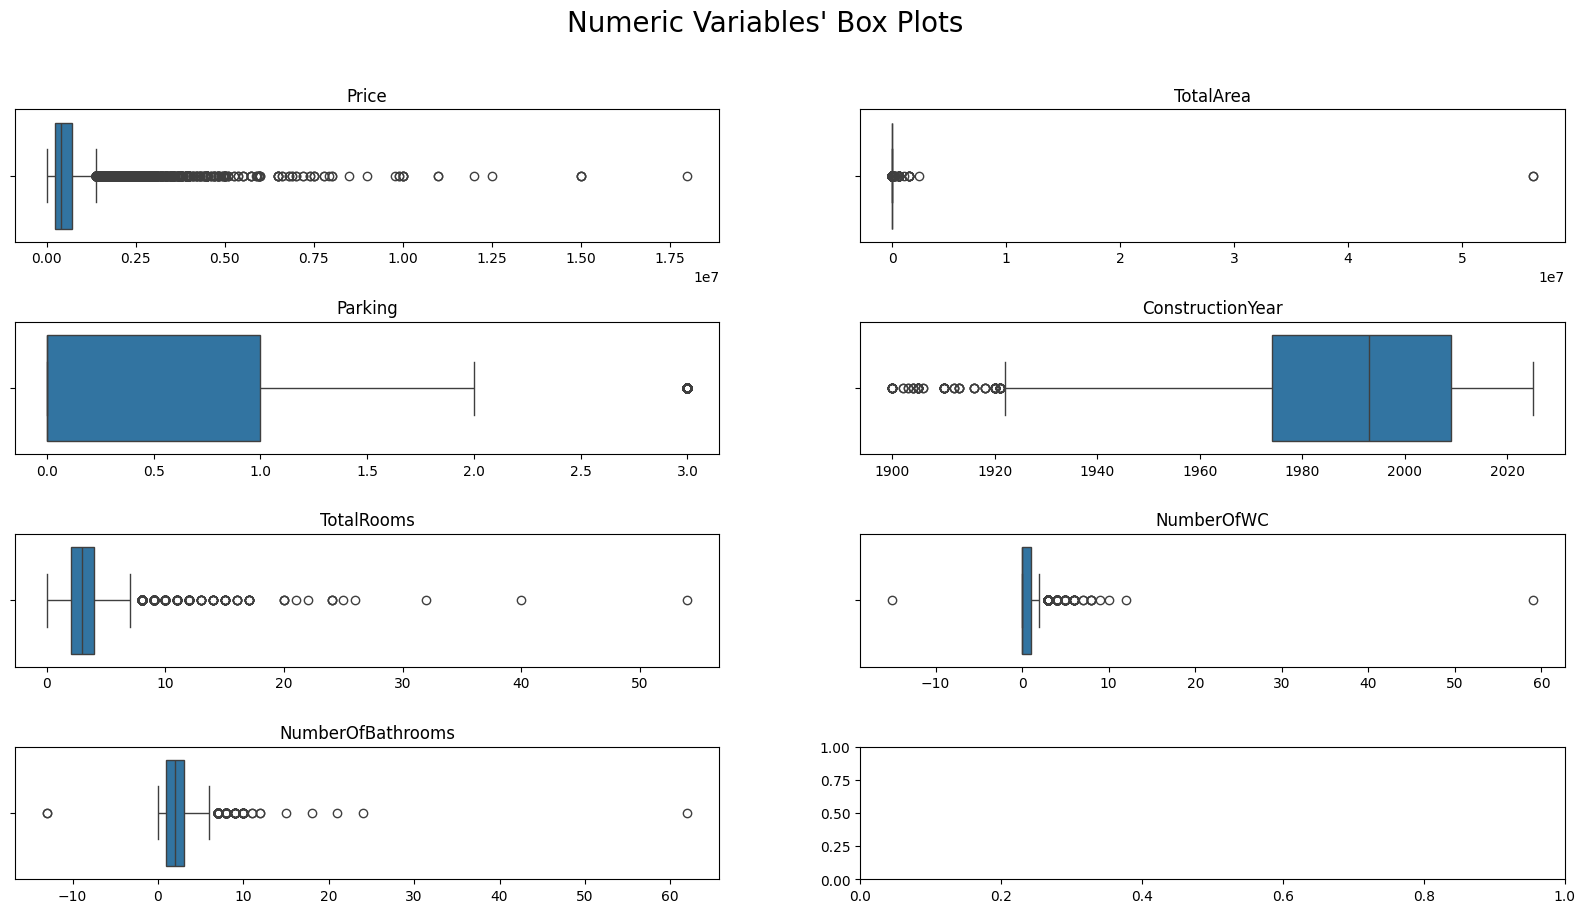

In [43]:
numerical_features = data.select_dtypes(exclude='object').columns.tolist()

plot_multiple_boxplots(data, numerical_features)

## Outlier delete - IQR

In [44]:
import math

In [45]:
def remove_outliers(df, columns):
  cleaned_df = data.copy()
  for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
  return cleaned_df

In [46]:
df_cleaned = remove_outliers(data, numerical_features)

In [47]:
print(f"Original dataset shape: {data.shape}")
print(f"New dataset shape after outlier removal: {df_cleaned.shape}")

Original dataset shape: (20637, 18)
New dataset shape after outlier removal: (4036, 18)


After deleting outliers using IQR, we have information loss, which is not deal. We will try to remove outliers manually.

In [48]:
def plot_multiple_boxplots(data, feats, title="Numeric Variables' Box Plots", figsize=(20, 10)):
  # Prepare figure. Create individual axes where each histogram will be placed
  fig, axes = plt.subplots(4, math.ceil(len(feats) / 4), figsize=figsize)

  # Plot data
  for ax, feat in zip(axes.flatten(), feats):
    sns.boxplot(x=data[feat], ax=ax)
    ax.set_title(feat)
    ax.set_xlabel("")

  # Layout
  # Add a centered title to the figure:
  plt.suptitle(title, fontsize=20)

  # Adjust vertical spacing between subplots
  plt.subplots_adjust(hspace=0.6)
  plt.show()
  return

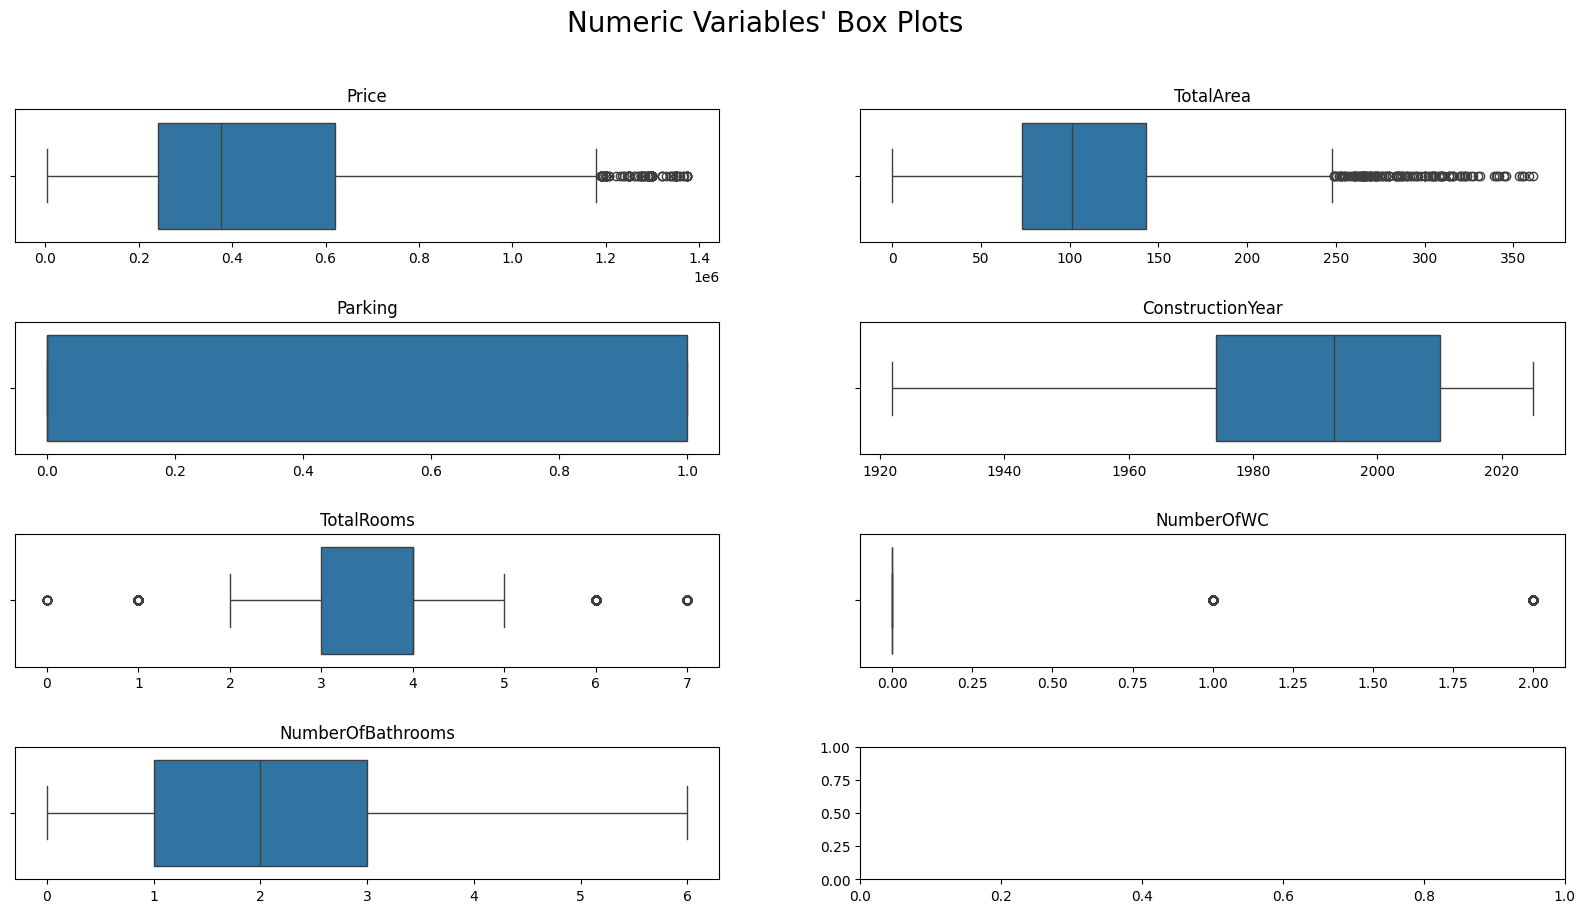

In [49]:
numeric_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
plot_multiple_boxplots(df_cleaned,numeric_features)

## Custom outlier removal

We use box plots to check outliers

In [50]:
def plot_px_boxplot(data, feature, min_t, max_t):
  # Create a box plot
  fig = px.box(data, x=feature, height=200, color_discrete_sequence=['black'])

  # Add threshold lines
  fig.add_trace(go.Scatter(x=[max_t, max_t], mode='lines', line=dict(color='blue', width=2), name='Max Threshold'))
  fig.add_trace(go.Scatter(x=[min_t,min_t], mode='lines', line=dict(color='red', width=2), name='Min Threshold'))
  fig.show()
  return

In [51]:
plot_px_boxplot(data,'Price',0,40000000)

In [52]:
plot_px_boxplot(data,'TotalArea',0,10000000)

In [53]:
plot_px_boxplot(data,'Parking',0,10)

In [54]:
plot_px_boxplot(data,'ConstructionYear',1700,2030)

In [55]:
plot_px_boxplot(data,'TotalRooms',0,150)

In [56]:
plot_px_boxplot(data,'NumberOfWC',0,5)

In [57]:
plot_px_boxplot(data,'NumberOfBathrooms',0,100)

We will filter outliers manually

In [58]:
# Store original dataset size
original_size = data.shape[0]

# Define manual outlier thresholds
outlier_conditions = {
    "Price": (0, 9000000), # change to 13,000,000
    "TotalArea": (0, 5000000),
    "Parking": (0, 2),
    "ConstructionYear": (1900, 2023),
    "TotalRooms": (1, 30), # change to 40
    "NumberOfWC": (1, 10), # change to 15
    "NumberOfBathrooms": (1, 18) # change to 25
}

# Identify and count outliers for each feature
outlier_counts = {}
for col, (lower, upper) in outlier_conditions.items():
    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    outlier_counts[col] = outliers

# Print number of outliers per feature
print("Number of outliers per feature:")
for feature, count in outlier_counts.items():
    print(f"{feature}: {count} outliers")

# Create a filter to remove outliers
filter_conditions = pd.Series(True, index=data.index)
for col, (lower, upper) in outlier_conditions.items():
    filter_conditions &= (data[col] >= lower) & (data[col] <= upper)

# Apply the filter to remove outliers
df_filtered = data[filter_conditions]

# Compute number of rows dropped
rows_dropped = original_size - df_filtered.shape[0]

# Compute percentage of data retained
percentage_retained = (df_filtered.shape[0] / original_size) * 100

# Display summary
print("\nSummary of Outlier Removal:")
print(f"Total rows dropped: {rows_dropped}")
print(f"Percentage of data retained: {percentage_retained:.2f}%")

Number of outliers per feature:
Price: 15 outliers
TotalArea: 2 outliers
Parking: 1315 outliers
ConstructionYear: 993 outliers
TotalRooms: 242 outliers
NumberOfWC: 5752 outliers
NumberOfBathrooms: 491 outliers

Summary of Outlier Removal:
Total rows dropped: 19459
Percentage of data retained: 5.71%


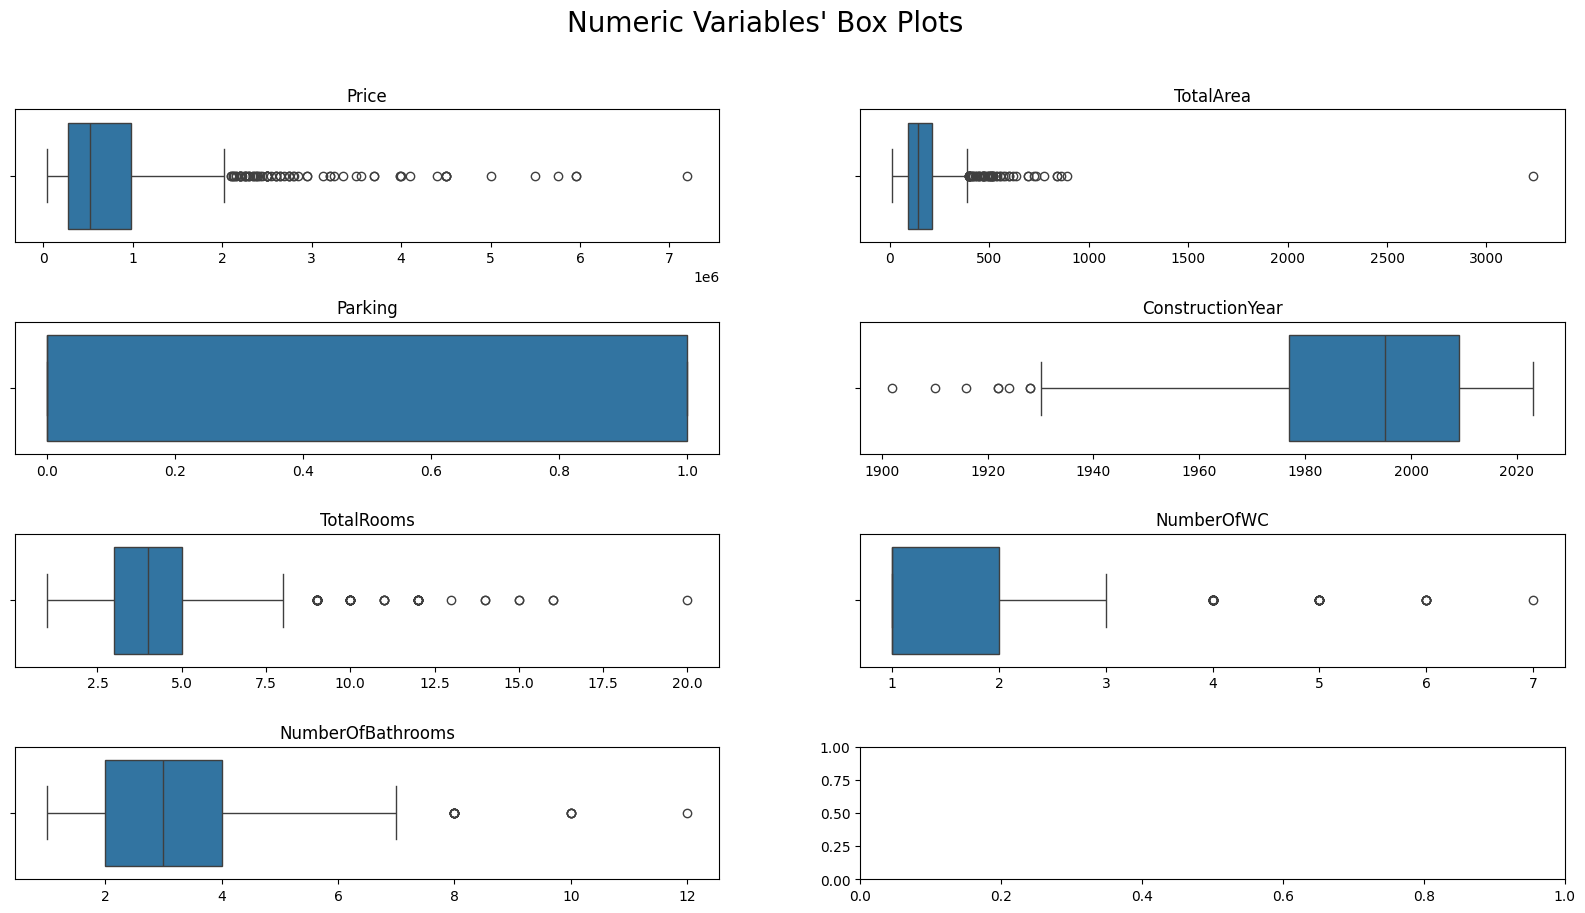

In [59]:
numeric_features = df_filtered.select_dtypes(include=['float64', 'int64']).columns.tolist()
plot_multiple_boxplots(df_filtered,numeric_features)

WIth manual removal, information loss still  happens. It probably would be useful to keep outliers. Outliers might contain information values.

## Keep outliers - Capping (Winsorization)

In [60]:
# Capping outliers instead of removing them
def cap_outliers(df, columns):
    capped_df = data.copy()
    for col in columns:
        Q1 = capped_df[col].quantile(0.25)
        Q3 = capped_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values instead of removing them
        capped_df[col] = np.where(capped_df[col] < lower_bound, lower_bound, capped_df[col])
        capped_df[col] = np.where(capped_df[col] > upper_bound, upper_bound, capped_df[col])

    return capped_df

df_capped = cap_outliers(data, numeric_features)
print(f"Original dataset size: {data.shape}")
print(f"Dataset shape after capping: {df_capped.shape}")

Original dataset size: (20637, 18)
Dataset shape after capping: (20637, 18)


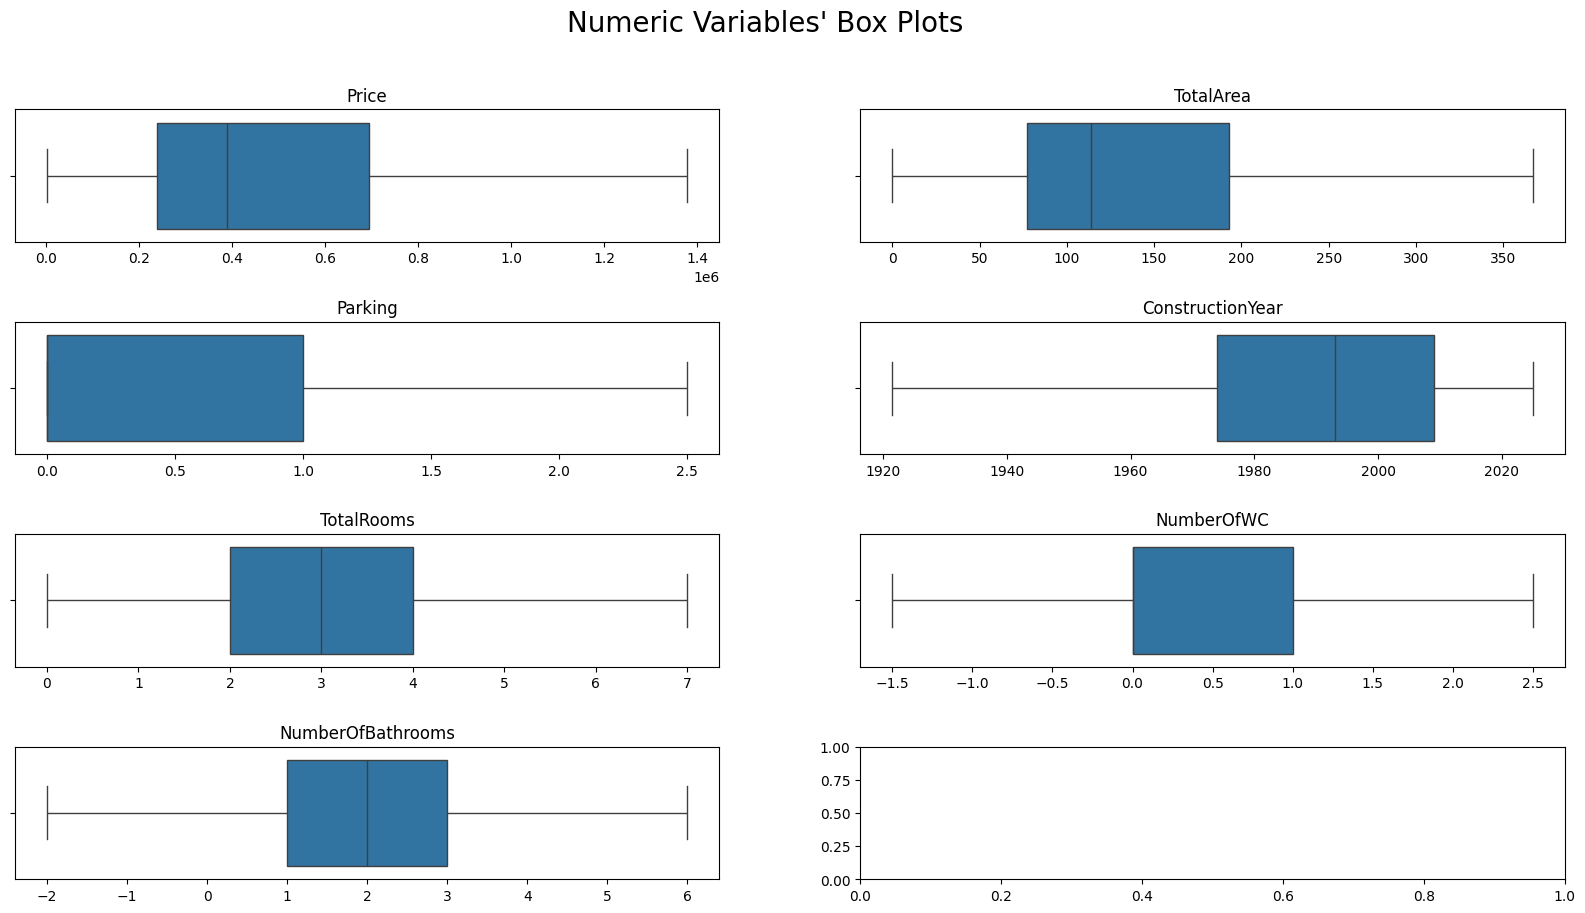

In [61]:
numerical_features = df_capped.select_dtypes(exclude='object').columns.tolist()

plot_multiple_boxplots(df_capped, numerical_features)

In [62]:
df_capped

,Price,District,City,Town,Type,EnergyCertificate,TotalArea,Parking,HasParking,Floor,ConstructionYear,EnergyEfficiencyLevel,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfWC,NumberOfBathrooms
757,200000.0,Lisboa,Sintra,Algueirão-Mem Martins,Apartment,C,79.0,1.0,True,1st Floor,2000.0,NaN,NaN,True,NaN,2.0,NaN,1.0
1619,595000.0,Lisboa,Lisboa,Misericórdia,Apartment,D,110.0,0.0,False,1st Floor,1937.0,NaN,NaN,False,NaN,4.0,NaN,2.0
1640,315000.0,Lisboa,Lisboa,Ajuda,Apartment,D,68.0,0.0,False,5th Floor,1963.0,NaN,NaN,True,NaN,2.0,NaN,1.0
1682,100000.0,Lisboa,Azambuja,Azambuja,Apartment,D,208.0,0.0,False,Basement Level,1978.0,NaN,NaN,False,NaN,2.0,NaN,1.0
2124,300000.0,Lisboa,Lisboa,Ajuda,Apartment,C,0.0,0.0,False,1st Floor,1967.0,NaN,NaN,True,NaN,2.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131591,765000.0,Lisboa,Lisboa,Misericórdia,Apartment,B-,91.0,0.0,NaN,NaN,2024.0,B-,False,True,False,1.0,0.0,2.0
131592,1200000.0,Lisboa,Lisboa,Misericórdia,Apartment,B-,110.0,0.0,NaN,NaN,2024.0,B-,False,True,False,2.0,0.0,3.0
131593,1250000.0,Lisboa,Lisboa,Misericórdia,Apartment,B-,110.0,0.0,NaN,NaN,2024.0,B-,False,True,False,2.0,0.0,3.0
131594,1379000.0,Lisboa,Lisboa,Misericórdia,Apartment,B-,158.0,0.0,NaN,NaN,2024.0,B-,False,True,False,3.0,0.0,4.0


In [63]:
df = df_capped.copy()

# Split data

## Missing value for target

There are 21 missing values for the target 'price'

In [64]:
df_missing_price = df[df['Price'].isnull()]
df_missing_price

,Price,District,City,Town,Type,EnergyCertificate,TotalArea,Parking,HasParking,Floor,ConstructionYear,EnergyEfficiencyLevel,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfWC,NumberOfBathrooms
8184,NaN,Lisboa,Lisboa,Avenidas Novas,Apartment,A+,63.0,1.0,True,2nd Floor,NaN,NaN,NaN,True,NaN,1.0,NaN,1.0
8185,NaN,Lisboa,Lisboa,Avenidas Novas,Apartment,A+,63.0,1.0,True,3rd Floor,NaN,NaN,NaN,True,NaN,1.0,NaN,1.0
8186,NaN,Lisboa,Lisboa,Avenidas Novas,Apartment,A+,63.0,1.0,True,4th Floor,NaN,NaN,NaN,True,NaN,1.0,NaN,1.0
8187,NaN,Lisboa,Lisboa,Avenidas Novas,Apartment,A+,63.0,1.0,True,5th Floor,NaN,NaN,NaN,True,NaN,1.0,NaN,1.0
8188,NaN,Lisboa,Lisboa,Avenidas Novas,Apartment,A+,67.0,1.0,True,4th Floor,NaN,NaN,NaN,True,NaN,1.0,NaN,1.0
8189,NaN,Lisboa,Lisboa,Avenidas Novas,Apartment,A+,67.0,1.0,True,5th Floor,NaN,NaN,NaN,True,NaN,1.0,NaN,1.0
8190,NaN,Lisboa,Lisboa,Avenidas Novas,Apartment,A+,137.0,1.0,True,1st Floor,NaN,NaN,NaN,True,NaN,2.0,NaN,3.0
8191,NaN,Lisboa,Lisboa,Avenidas Novas,Apartment,A+,116.0,1.0,True,2nd Floor,NaN,NaN,NaN,True,NaN,2.0,NaN,2.0
8192,NaN,Lisboa,Lisboa,Avenidas Novas,Apartment,A+,116.0,1.0,True,4th Floor,NaN,NaN,NaN,True,NaN,2.0,NaN,2.0
8193,NaN,Lisboa,Lisboa,Avenidas Novas,Apartment,A+,116.0,1.0,True,5th Floor,NaN,NaN,NaN,True,NaN,2.0,NaN,2.0


21 of 20637, 21 data has missing 'price' info. since this accounts for 0.1%, we will remove the missing data.

In [65]:
df = df.dropna(subset=['Price'])

In [66]:
df[df['Price'].isnull()]

,Price,District,City,Town,Type,EnergyCertificate,TotalArea,Parking,HasParking,Floor,ConstructionYear,EnergyEfficiencyLevel,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfWC,NumberOfBathrooms


Split data

In [67]:
X = df.drop('Price', axis=1)
y = df['Price']

# train and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# validation and test from temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Train set size: (14431, 17)
Validation set size: (3092, 17)
Test set size: (3093, 17)


# Preprocessing

In [68]:
# Identify numeric and categorical columns

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps for numeric features
# SimpleImputer 'mean' used
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

In [69]:
# Create the full preprocessing pipeline
# imputation, scaling, encoding

full_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# fit and transform the training data
X_train_processed = full_pipeline.fit_transform(X_train)

#transform validation and test data
X_val_processed = full_pipeline.transform(X_val)
X_test_processed = full_pipeline.transform(X_test)

print("\nShape of processed training data:", X_train_processed.shape)
print("Shape of processed validation data:", X_val_processed.shape)
print("Shape of processed test data:", X_test_processed.shape)


Shape of processed training data: (14431, 211)
Shape of processed validation data: (3092, 211)
Shape of processed test data: (3093, 211)


# Train models

## LinearRegression

In [70]:
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

y_pred_lr_val = lr_model.predict(X_val_processed)
y_pred_lr_test = lr_model.predict(X_test_processed)

## Decision Tree

In [71]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_processed, y_train)

y_pred_dt_val = dt_model.predict(X_val_processed)
y_pred_dt_test = dt_model.predict(X_test_processed)

## Random Forest

In [72]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_processed, y_train)

y_pred_rf_val = rf_model.predict(X_val_processed)
y_pred_rf_test = rf_model.predict(X_test_processed)

# Results

## Evaluation (Validation set) - Mean Squared Error / R2

In [73]:
# Linear Regression

mse_lr_val = mean_squared_error(y_val, y_pred_lr_val)
r2_lr_val = r2_score(y_val, y_pred_lr_val)
print(f"Linear Regression - Validation MSE: {mse_lr_val:.4f}")
print(f"Linear Regression - Validation R2: {r2_lr_val:.4f}")

Linear Regression - Validation MSE: 34059800747.2880
Linear Regression - Validation R2: 0.7555


In [74]:
# Decision Tree

mse_dt_val = mean_squared_error(y_val, y_pred_dt_val)
r2_dt_val = r2_score(y_val, y_pred_dt_val)
print(f"Decision Tree - Validation MSE: {mse_dt_val:.4f}")
print(f"Decision Tree - Validation R2: {r2_dt_val:.4f}")

Decision Tree - Validation MSE: 35781441054.2760
Decision Tree - Validation R2: 0.7432


In [75]:
# Random Forest

mse_rf_val = mean_squared_error(y_val, y_pred_rf_val)
r2_rf_val = r2_score(y_val, y_pred_rf_val)
print(f"Random Forest - Validation MSE: {mse_rf_val:.4f}")
print(f"Random Forest - Validation R2: {r2_rf_val:.4f}")


Random Forest - Validation MSE: 19523951782.8659
Random Forest - Validation R2: 0.8599


## Evaluation (Test set) - MSE / R2

In [76]:
# Linear Regression
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
r2_lr_test = r2_score(y_test, y_pred_lr_test)
print(f"Linear Regression - Test MSE: {mse_lr_test:.4f}")
print(f"Linear Regression - Test R2: {r2_lr_test:.4f}")

Linear Regression - Test MSE: 32186638438.3270
Linear Regression - Test R2: 0.7696


In [77]:
# Decision Tree

mse_dt_test = mean_squared_error(y_test, y_pred_dt_test)
r2_dt_test = r2_score(y_test, y_pred_dt_test)
print(f"Decision Tree - Test MSE: {mse_dt_test:.4f}")
print(f"Decision Tree - Test R2: {r2_dt_test:.4f}")

Decision Tree - Test MSE: 31199310397.7686
Decision Tree - Test R2: 0.7767


In [78]:
# Random Forest

mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)
print(f"Random Forest - Test MSE: {mse_rf_test:.4f}")
print(f"Random Forest - Test R2: {r2_rf_test:.4f}")

Random Forest - Test MSE: 18223484091.5970
Random Forest - Test R2: 0.8696


We used three different models, such as LinearRegression, Decision Tree, and Random Forest. As shown in the previous code, it was observed that Random Forest produced the best performance, with R2 square 0.8599 for validation set, and 0.8996 for test set.   

* R2 score of 0.8996 means that Random Forest model explains approximately 89.96% of the variability in the 'Price' on unseen data, suggesting that the model has learned the underlying patterns well and generalizes effectively. The test set R2 score is higher than the R2 score from validation set, which is a positive sign.

* Mean Squared Error (MSE) is a measure of the average squared difference between predicted and actual values in a regression model. A lower MSE indicates a better model fit, suggesting the predictions are closer to the actual values. From our models, Random Forest shows the lowest MSE values, compared to LinearRegression and Decision Tree.


# Save RF Model

In [79]:
import joblib

In [83]:
# random forest mnodel
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalArea', 'Parking',
                                                   'ConstructionYear',
                                                   'TotalRooms', 'NumberOfWC',
                                                   'NumberOfBathrooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['District', 'City', 'Town',
                                                   'Type', 'EnergyCertificate',
                                                   'HasParking', 'Floor',
                                                   'EnergyEfficiencyLevel',
                                                   'Garage', 'Elevator',
                                                   'ElectricCarsCharging'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [84]:
y_pred_rf_val = pipeline_rf.predict(X_val)
y_pred_rf_test = pipeline_rf.predict(X_test)

In [85]:
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)
print(f"Random Forest - Test MSE: {mse_rf_test:.4f}")
print(f"Random Forest - Test R2: {r2_rf_test:.4f}")

Random Forest - Test MSE: 18223484091.5970
Random Forest - Test R2: 0.8696


In [87]:
# define file name for the model
filename = '/content/drive/MyDrive/ML Project/housing/rf_model.joblib'

In [88]:
# Save the model
joblib.dump(pipeline_rf, filename)

print(f"Model saved to {filename}")

Model saved to /content/drive/MyDrive/ML Project/housing/rf_model.joblib
